We see that our dataset is mad of $n=546$ and $p=12$. These are its main features.

Let's also plot the histogram of Price  in order to check normality and the boxplot, otherwise let's apply a log transformation.
It easy to see that is better consider a log-tranformation. So I will refer to price variable as log(price) in the following analysis.

[1] "houses"

[1] "price"      "lotsize"    "bedrooms"   "bathrooms"  "stories"   
 [6] "driveway"   "recreation" "fullbase"   "gasheat"    "aircon"    
[11] "garage"     "prefer"

[1] 546

[1] 12

price lotsize stories prefer aircon
1 42000 5850    2       no     no    
2 38500 4000    1       no     no    
3 49500 3060    1       no     no

     price           lotsize         stories      prefer    aircon   
 Min.   : 25000   Min.   : 1650   Min.   :1.000   no :418   no :373  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:1.000   yes:128   yes:173  
 Median : 62000   Median : 4600   Median :2.000                      
 Mean   : 68122   Mean   : 5150   Mean   :1.808                      
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:2.000                      
 Max.   :190000   Max.   :16200   Max.   :4.000                      

[1] 0

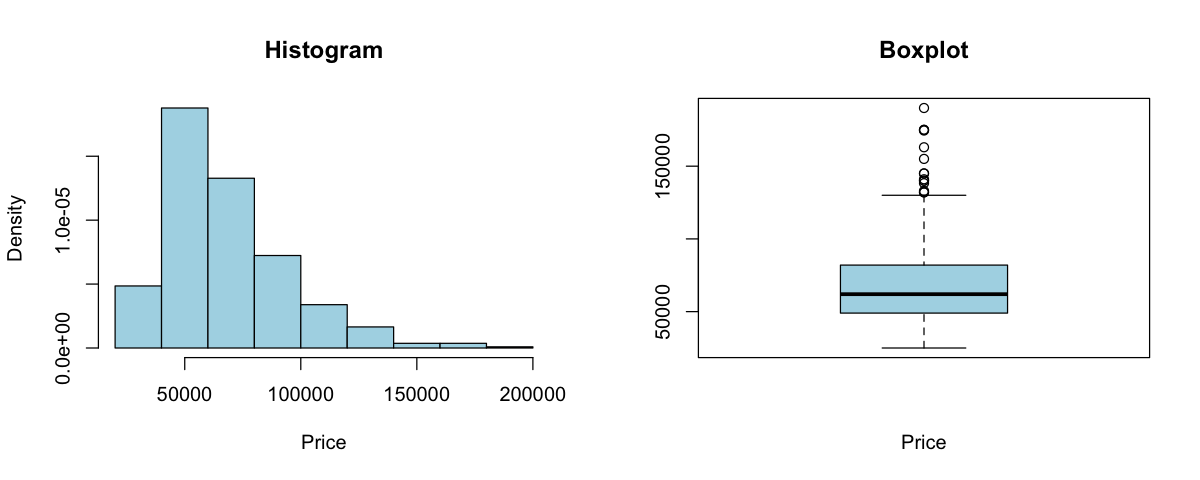

price    lotsize stories prefer aircon
1 10.64542 5850    2       no     no    
2 10.55841 4000    1       no     no    
3 10.80973 3060    1       no     no

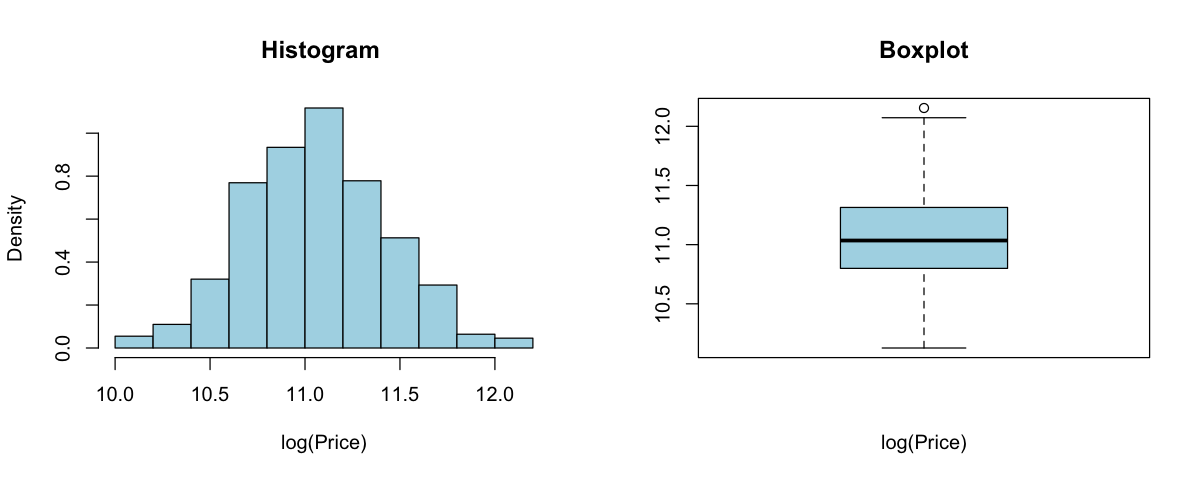

In [2]:
## load the data

load("houses.RData")
ls()
names(houses)
mydata<-houses
nrow(mydata)
ncol(mydata)

mydata <- mydata[, c('price', 'lotsize', 'stories', 'prefer', 'aircon')]
mydata[1:3,]

summary(mydata)

#check NA values
sum(is.na(mydata))
#clean from NA
mydata <- na.omit(mydata)

#check that they are factors otherwise make it

mydata$stories<-as.factor(mydata$stories)

## SE HAI VARIABILI QUALITATIVE CON DEI LIVELLI PLOTTA LA TABELLA 

par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 4)
hist(mydata$price, prob=TRUE, xlab='Price', main='Histogram',col="lightblue")
boxplot(mydata$price, xlab='Price', main='Boxplot',col="lightblue" )
hist(log(mydata$price), prob=TRUE, xlab='log(Price)', main='Histogram ',col="lightblue")
boxplot(log(mydata$price), xlab='log(Price)', main='Boxplot',col="lightblue" )

mydata$price<-log((mydata$price))

mydata[1:3,]


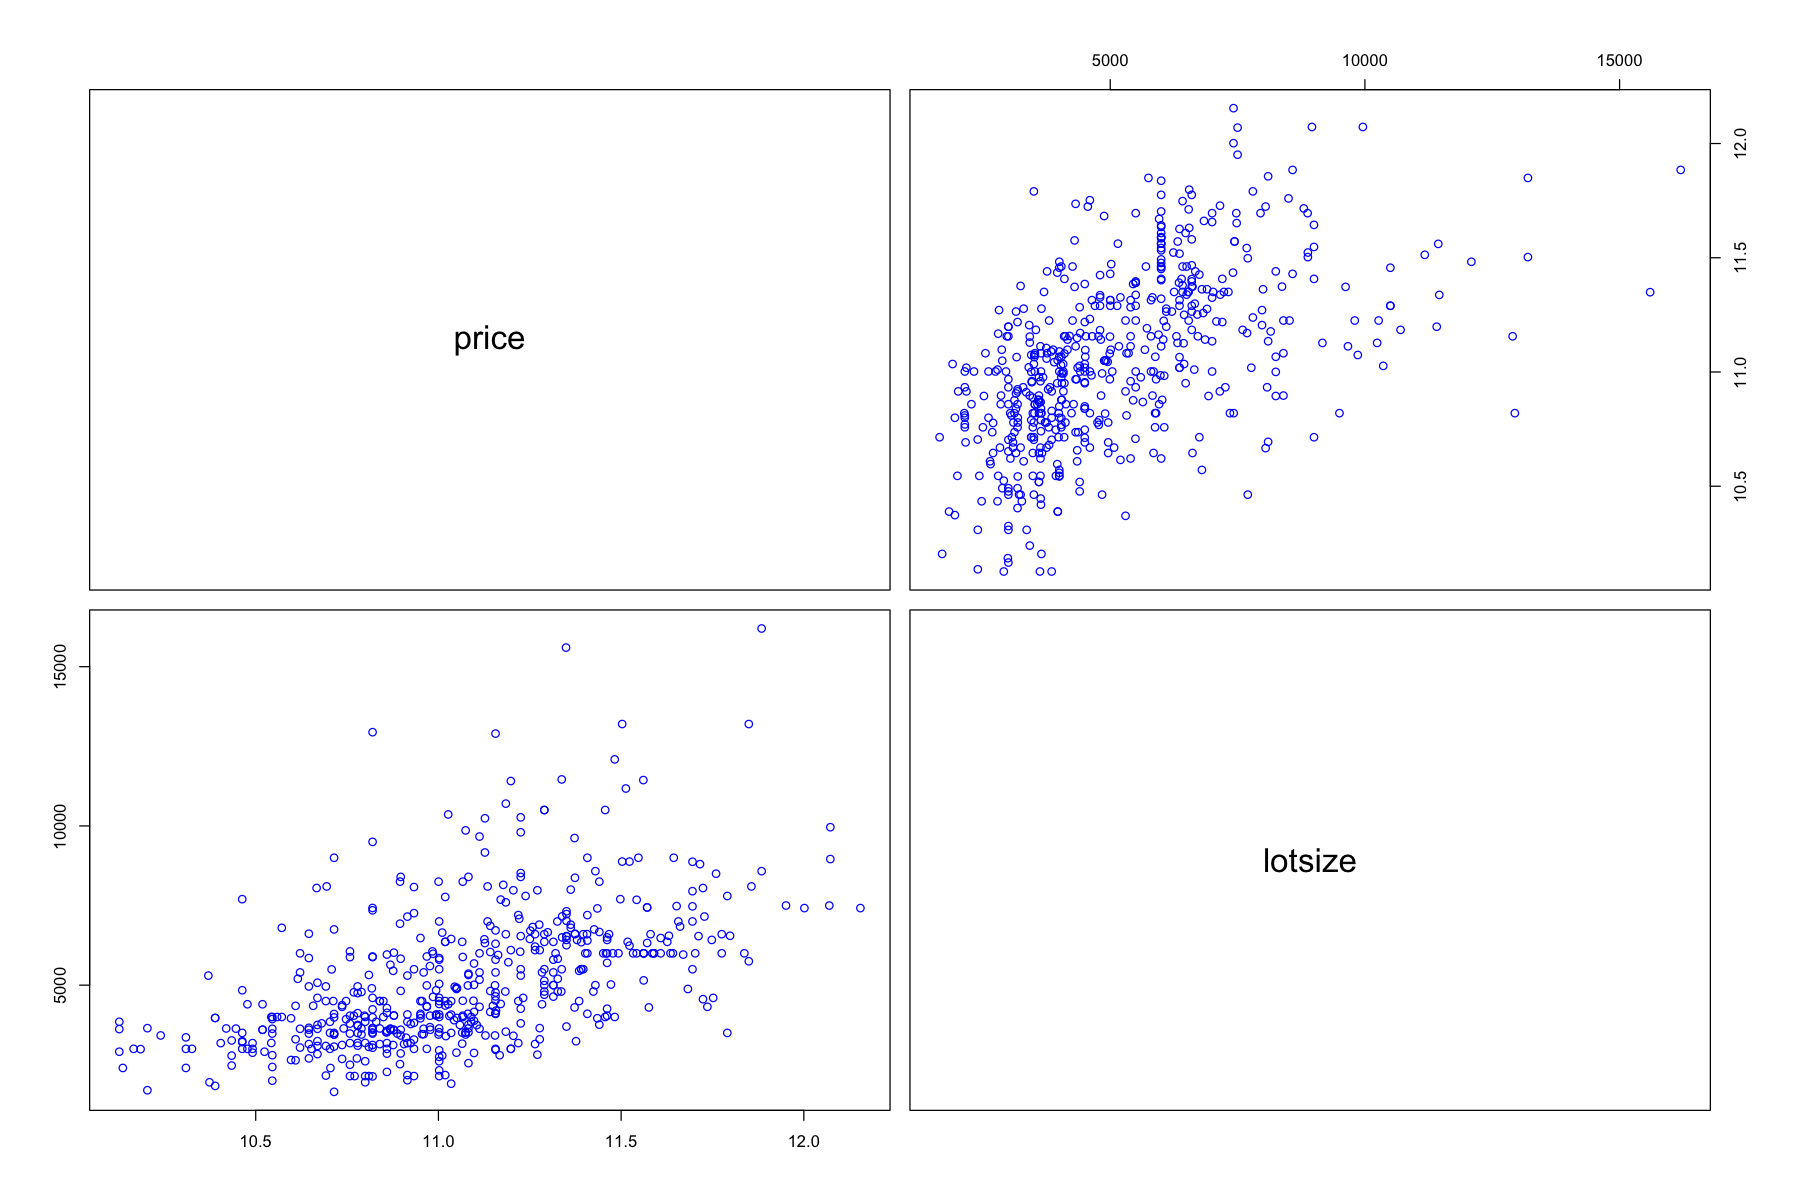

In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)
pairs(mydata[,1:2],col="blue")

 Let also check the relationship between Y and the covariates X. From this plot we can see a linear relationship between lotsize and price. 
 
 
Regardign the interections between variables we see from the following plots that the partial overlapping of the observations belonging to the two groups (second and third scatterplot) and to the four group(first scatterplot) suggests that there would not be interactions between the covariates. The same type of conclusions can be reached analysing the boxplots and the mosaic plots (that are shown for a purpose of completeness).

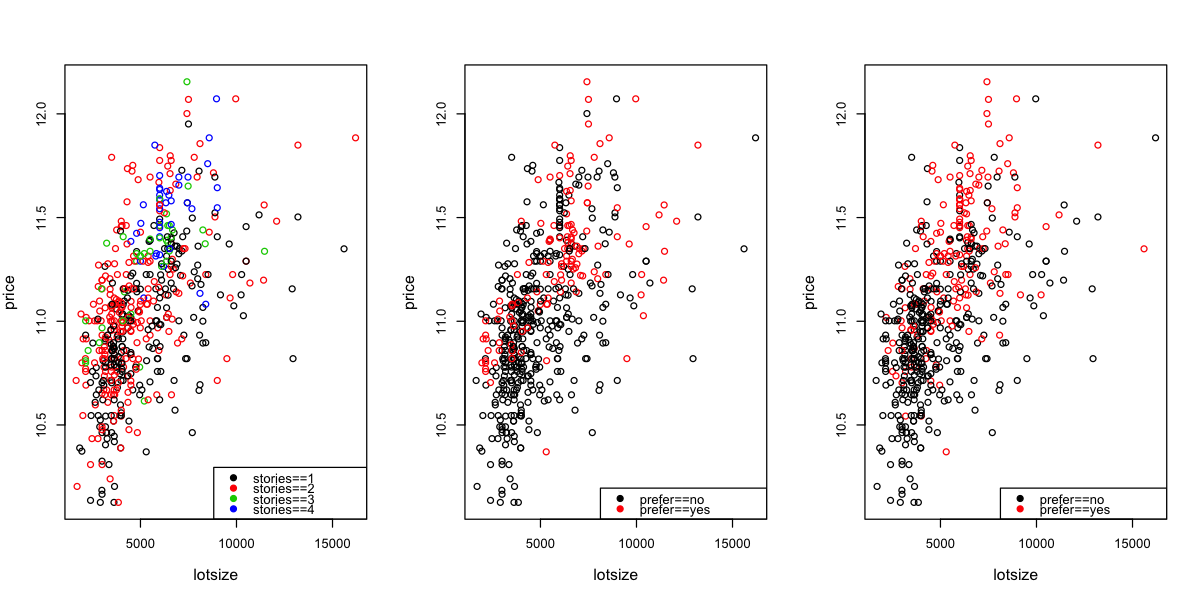

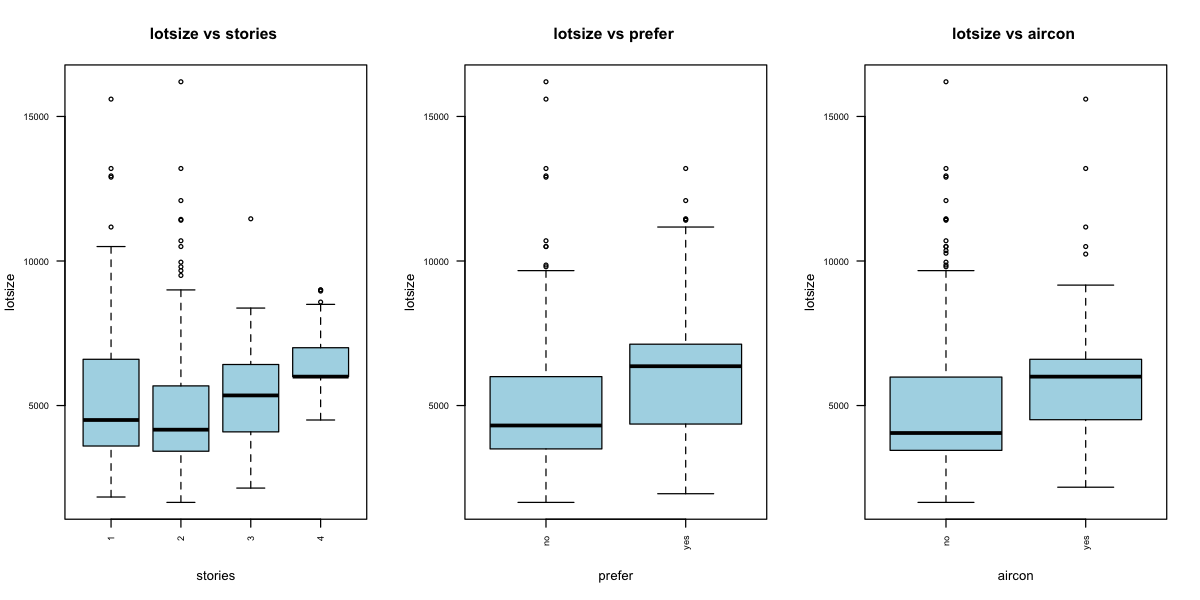

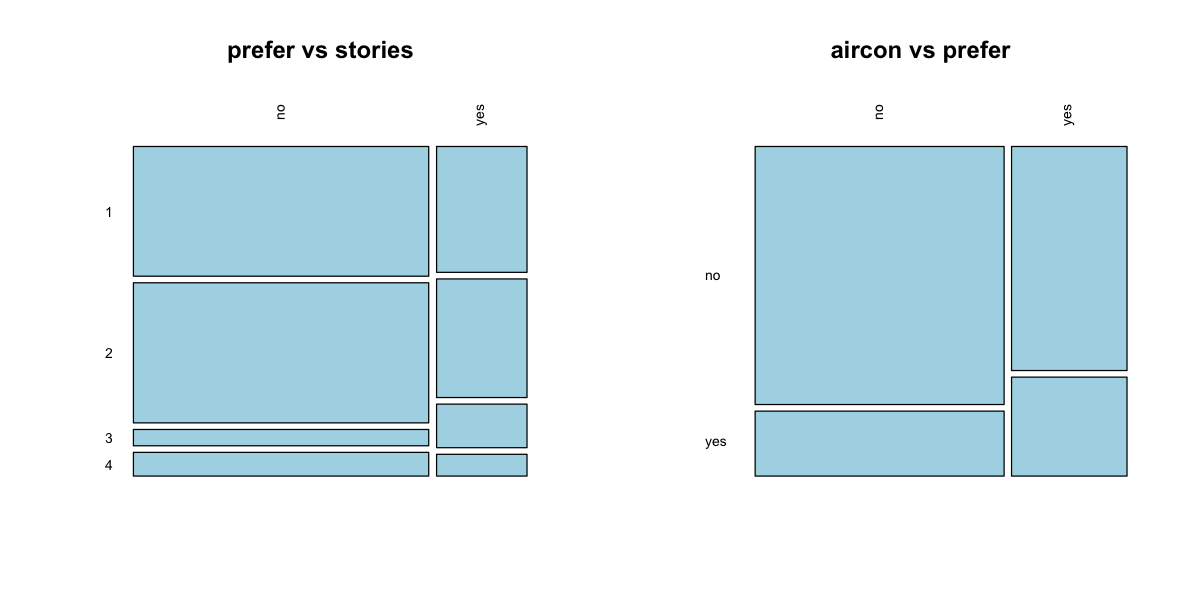

In [3]:
## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,3))
options(repr.plot.width = 10, repr.plot.height = 5)

plot(mydata$lotsize, mydata$price, cex.lab=1.2, xlab='lotsize', ylab='price',col=mydata$stories)
legend('bottomright', col=c(1,2,3,4), pch=c(19,19),
        legend=c('stories==1','stories==2','stories==3','stories==4'))


plot(mydata$lotsize, mydata$price, cex.lab=1.2, xlab='lotsize', ylab='price',col=mydata$prefer)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('prefer==no','prefer==yes'))


plot(mydata$lotsize, mydata$price, cex.lab=1.2, xlab='lotsize', ylab='price',col=mydata$aircon)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('prefer==no','prefer==yes'))





## plot boxplot per eventuali iterazioni (basati pero sempre su quello sopra)
boxplot(mydata$lotsize~ mydata$stories, las=2, cex.axis=0.7,col="lightblue",xlab="stories",
ylab='lotsize', main='lotsize vs stories ')
boxplot(mydata$lotsize~ mydata$prefer, las=2, cex.axis=0.7,col="lightblue",xlab="prefer",
ylab='lotsize', main='lotsize vs prefer ')
boxplot(mydata$lotsize~ mydata$aircon, las=2, cex.axis=0.7,col="lightblue",xlab="aircon",
ylab='lotsize', main='lotsize vs aircon ')
#boxplot(mydata$x1~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x1 vs x2-livello ')
#boxplot(mydata$x2~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x2~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x2 vs x2-livello ')
#boxplot(mydata$x3~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x3~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x3 vs x2-livello ')

par(mfrow=c(1,2))
## plot moasic plot
mosaicplot(table(mydata$prefer,mydata$stories), las=2, cex.axis=0.7,col="lightblue",
xlab='', main='prefer vs stories ')
mosaicplot(table( mydata$aircon, mydata$prefer), las=2, cex.axis=0.7,col="lightblue",
xlab='', main='aircon vs prefer ')
#mosaicplot(table(mydata$x1, mydata$x1-livello), main='x1 vs x1-livello',col="lightblue")
#mosaicplot(table(mydata$x1, mydata$x2-livello), main='x1 vs x2-livello',col="lightblue")
#mosaicplot(table(mydata$x1-livello, mydata$x2-livello), main='x1-livello vs x2-livello',col="lightblue")

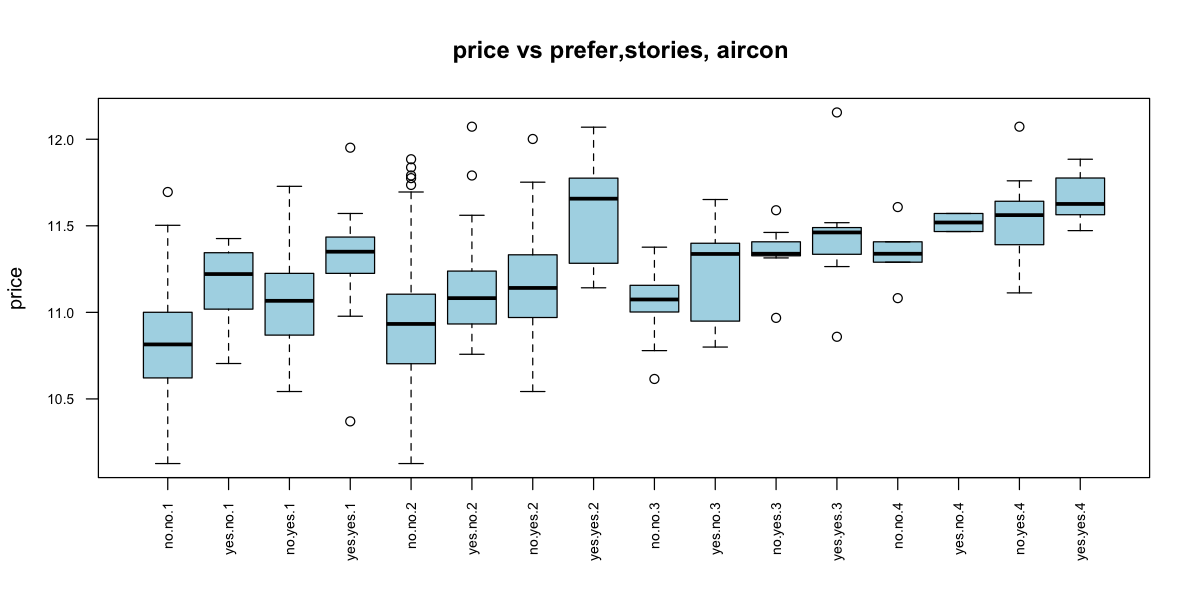

In [4]:
boxplot(mydata$price~ mydata$prefer*mydata$aircon*mydata$stories, las=2, cex.axis=0.7,col="lightblue",ylab="price",
xlab='', main='price vs prefer,stories, aircon ')

After this preliminary analysis we can apply a linear regression. Let's start with a model with all variables and interactions and then perform model selection base ond $P-value$.

So I started with a model including also the interactions between the covariates then the final model I have obtained is the following output.
In the table below the 95% CI for coefficients is reported.

In [5]:
model.mydata <- lm(price~lotsize*prefer + lotsize*stories + lotsize*aircon + prefer*stories+prefer*aircon+stories*aircon , data=mydata)


## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
model.mydata2 <- update(model.mydata, .~.-aircon:stories)


model.mydata3 <- update(model.mydata2, .~.-aircon:prefer)




model.mydata4 <- update(model.mydata3, .~.-stories:prefer)




model.mydata5<- update(model.mydata4, .~.-stories:lotsize)




model.mydata6<- update(model.mydata5, .~.-prefer:lotsize)





model.mydata7<- update(model.mydata6, .~.-aircon:lotsize)

summary(model.mydata7)
### ANDARE AVANTI UPDATANDO MODELLO RIMUOVENDO INTERAZIONI NON SIGNIFICATIVE FINCHE NON ARRIVI CHE TUTTE HANNO P-VALUE SOTTO 5%.

## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
#model.mydata3 <- update(model.mydata2, .~.-x3:x4)
#summary(model.mydata3)

confint(model.mydata7)


Call:
lm(formula = price ~ lotsize + prefer + stories + aircon, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86355 -0.15737  0.00156  0.14700  0.91626 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.047e+01  3.217e-02 325.484  < 2e-16 ***
lotsize     7.198e-05  5.387e-06  13.361  < 2e-16 ***
preferyes   1.782e-01  2.689e-02   6.627 8.30e-11 ***
stories2    1.528e-01  2.389e-02   6.393 3.53e-10 ***
stories3    2.306e-01  4.462e-02   5.168 3.34e-07 ***
stories4    3.803e-01  4.580e-02   8.304 8.14e-16 ***
airconyes   2.046e-01  2.536e-02   8.066 4.74e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2553 on 539 degrees of freedom
Multiple R-squared:  0.5341,	Adjusted R-squared:  0.5289 
F-statistic:   103 on 6 and 539 DF,  p-value: < 2.2e-16


2.5 %        97.5 %      
(Intercept) 1.040644e+01 1.053282e+01
lotsize     6.139331e-05 8.255674e-05
preferyes   1.253984e-01 2.310508e-01
stories2    1.058151e-01 1.996893e-01
stories3    1.429202e-01 3.182063e-01
stories4    2.903733e-01 4.703083e-01
airconyes   1.547588e-01 2.544094e-01

This choice is also justify by considering the $F-statistic$, in fact we can see it from the following output:

In [6]:
anova(model.mydata,model.mydata7)

Res.Df RSS      Df  Sum of Sq  F         Pr(>F)   
1 527    34.80816  NA         NA        NA        NA
2 539    35.13692 -12 -0.3287594 0.4147882 0.9579468

If we try with a polynomial in lotsize we obtain the following output, so is useful to insert a polynomial term:

In [7]:
model.mydata8<-update(model.mydata7, .~.+I(lotsize^2))
summary(update(model.mydata7, .~.+I(lotsize^2)))


Call:
lm(formula = price ~ lotsize + prefer + stories + aircon + I(lotsize^2), 
    data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87787 -0.14681  0.00535  0.14558  0.92319 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.023e+01  6.005e-02 170.387  < 2e-16 ***
lotsize       1.581e-04  1.922e-05   8.224 1.49e-15 ***
preferyes     1.714e-01  2.643e-02   6.487 1.99e-10 ***
stories2      1.607e-01  2.351e-02   6.835 2.23e-11 ***
stories3      2.272e-01  4.379e-02   5.188 3.01e-07 ***
stories4      3.533e-01  4.532e-02   7.796 3.32e-14 ***
airconyes     1.867e-01  2.518e-02   7.415 4.75e-13 ***
I(lotsize^2) -6.390e-09  1.371e-09  -4.660 4.00e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2506 on 538 degrees of freedom
Multiple R-squared:  0.5521,	Adjusted R-squared:  0.5463 
F-statistic: 94.76 on 7 and 538 DF,  p-value: < 2.2e-16


In [8]:
anova(model.mydata7,model.mydata8)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 539    35.13692 NA       NA        NA           NA
2 538    33.77397  1 1.362953  21.71106 4.000281e-06

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large.

-ELIMINARE eventuale outlier -> segnati comando

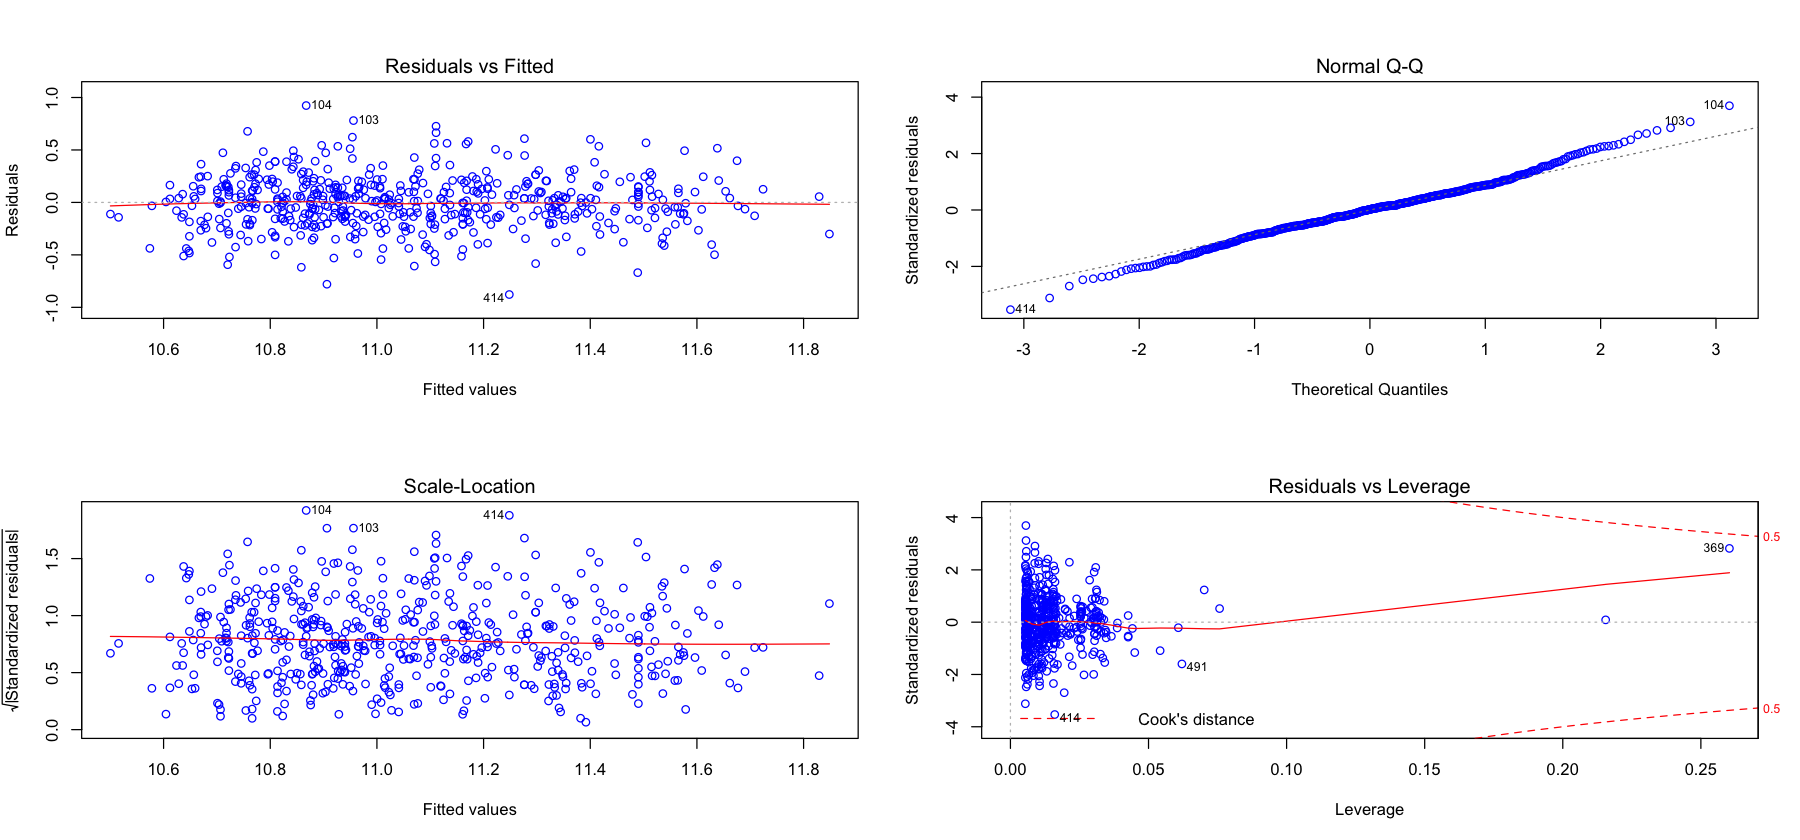

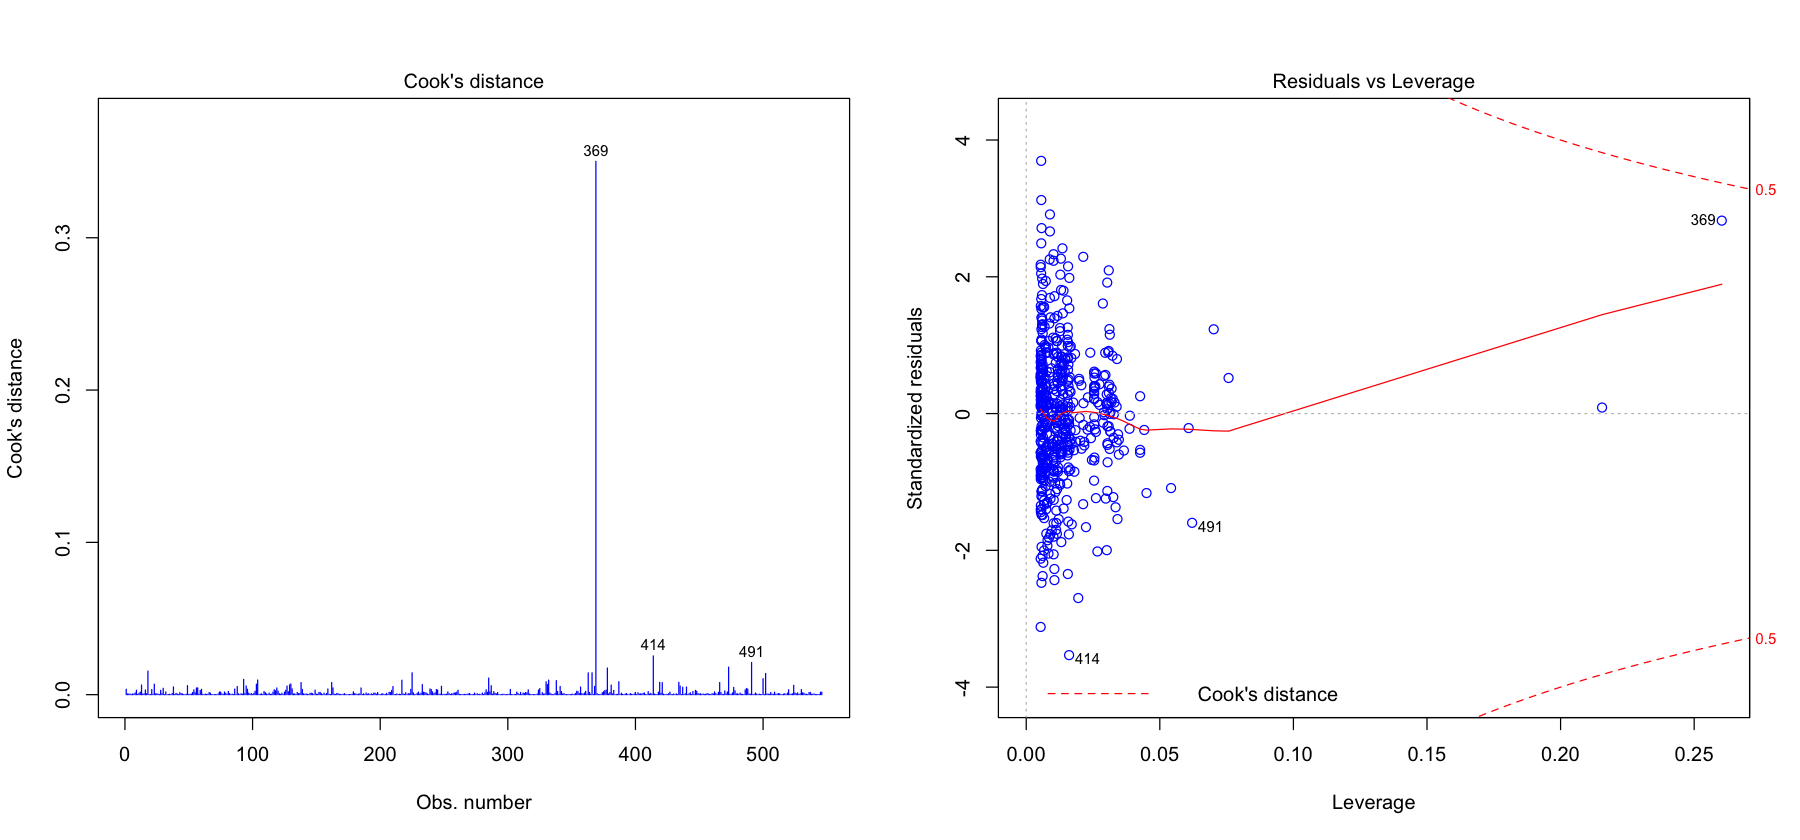

In [9]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(model.mydata8,col="blue")
### plot the Cook's distance
par(mfrow=c(1,2))
plot(model.mydata8, 4,col="blue")
plot(model.mydata8, 5,col="blue")

Now let's use  , as said before, the smoothing splines for the variables that are not linear. In order to find the degrees of freedom I have used the cross validation. I set the seed at 111.

In [10]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$lotsize, y=mydata$price, cv=TRUE)
x1.cv 
#x2.cv = smooth.spline(x= mydata$x2, y=mydata$y, cv=TRUE)
#x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(price ~ prefer+stories+aircon + s(lotsize, 4) +poly(lotsize,2),
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Loading required package: splines
Loading required package: foreach
Loaded gam 1.16.1

Warning message in smooth.spline(x = mydata$lotsize, y = mydata$price, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

Call:
smooth.spline(x = mydata$lotsize, y = mydata$price, cv = TRUE)

Smoothing Parameter  spar= 1.116155  lambda= 0.01766225 (12 iterations)
Equivalent Degrees of Freedom (Df): 4.830685
Penalized Criterion (RSS): 27.10847
PRESS(l.o.o. CV): 0.08948772

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = price ~ prefer + stories + aircon + s(lotsize, 
    4) + poly(lotsize, 2), data = mydata)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-0.890354 -0.147430  0.004408  0.143483  0.922977 

(Dispersion Parameter for gaussian family taken to be 0.062)

    Null Deviance: 75.4132 on 545 degrees of freedom
Residual Deviance: 33.192 on 534.9999 degrees of freedom
AIC: 44.5125 

Number of Local Scoring Iterations: 7 

Anova for Parametric Effects
                  Df Sum Sq Mean Sq  F value  Pr(>F)    
prefer             1  8.848  8.8475 142.6075 < 2e-16 ***
stories            3 12.120  4.0401  65.1197 < 2e-16 ***
aircon             1  6.360  6.3600 102.5118 < 2e-16 ***
s(lotsize, 4)      1 11.933 11.9327 192.3354 < 2e-16 ***
poly(lotsize, 2)   1  0.399  0.3993   6.4358 0.01147 *  
Residuals        535 33.192  0.0620                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
           

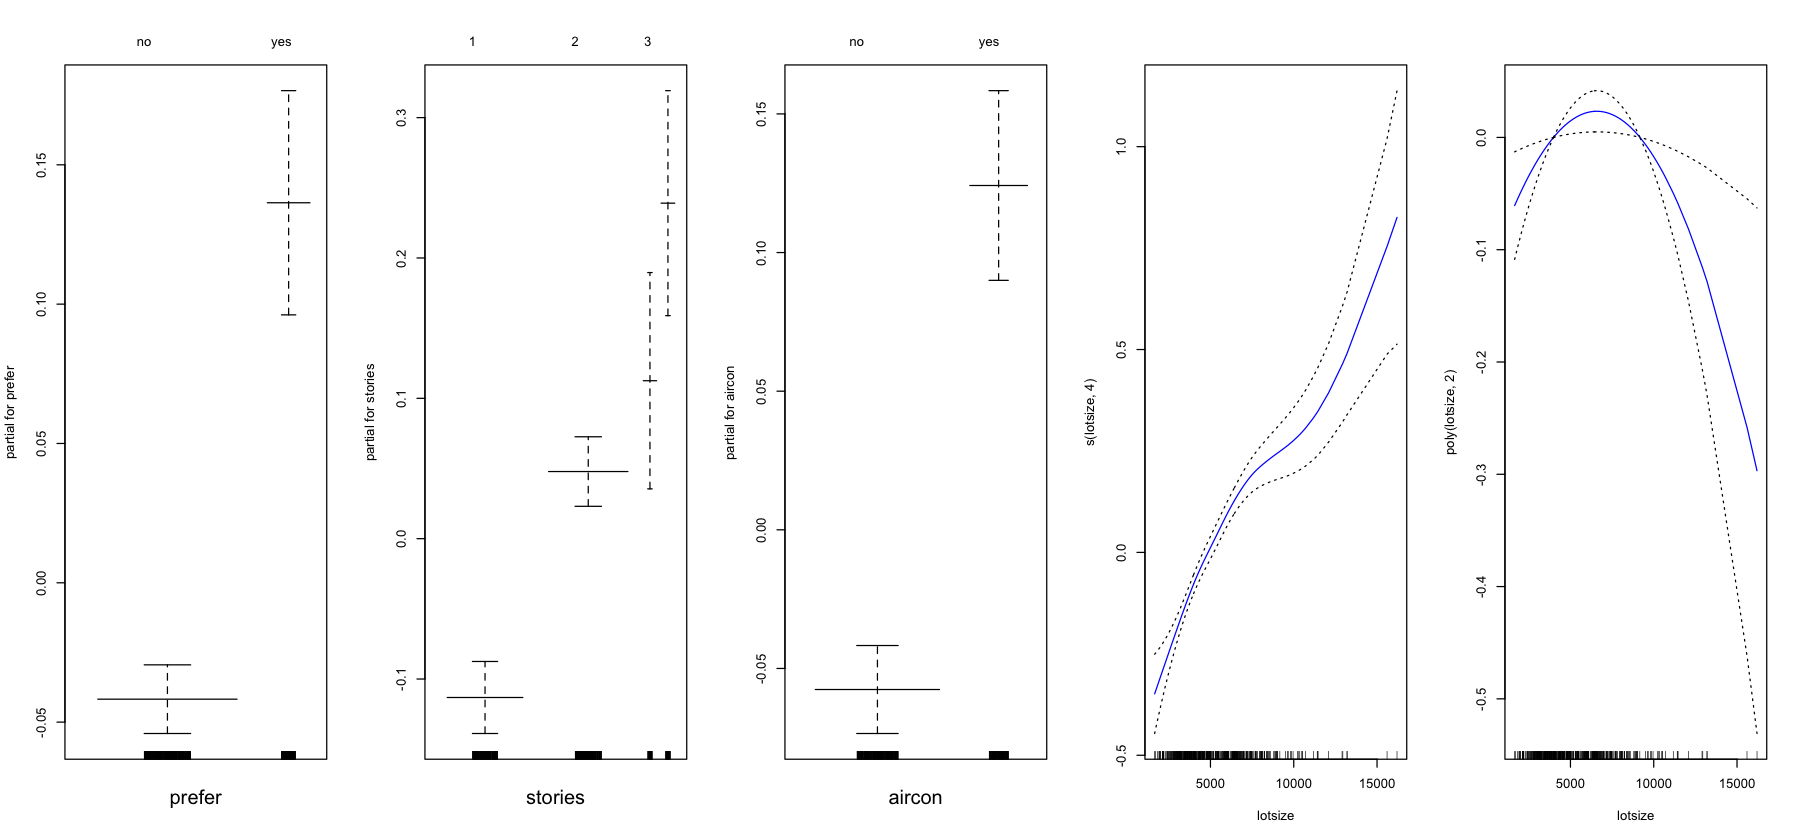

In [11]:
par(mfrow=c(1,5))
plot(m.gam, se=TRUE,col="blue")

From the output,based on $P-value$ we see that we do need smoothing splines for lotsize.
Furthermore from the plot we see that as much observation we have as the CI is close to the line as the fit is good.



# Conclusion Point 1

We have obtained that the best model is:

$ Price = 4.81+ 0.003*Horsepower -0.27*Origin_{I=non USA} -0.16 *MPG.city + 0.0022*MPG.city^2 +  0.003*Horsepower*Origin_{I=non USA} $

In the following plot  there are the  predictions based on the best model.

In [ ]:
### plot prediction

plot(mydata$price, predict(m.gam), xlab='log(price)', ylab='Predictions',
       pch=19, main='Smoothing splines',col="blue")
abline(0, 1, col='red', lwd=2)

### RIDGE

Let's consider all the dataset.

In [30]:
load("houses.RData")
mydata<-houses
library(glmnet)
mydata$price<-log((mydata$price))

y <-  mydata$price
X <- model.matrix(price ~ .+I(lotsize^2), data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0)
m.ridge


Call:  glmnet(x = X, y = y, alpha = 0) 

       Df      %Dev    Lambda
  [1,] 12 3.540e-36 201.80000
  [2,] 12 7.026e-03 183.80000
  [3,] 12 7.705e-03 167.50000
  [4,] 12 8.449e-03 152.60000
  [5,] 12 9.264e-03 139.10000
  [6,] 12 1.016e-02 126.70000
  [7,] 12 1.113e-02 115.50000
  [8,] 12 1.220e-02 105.20000
  [9,] 12 1.338e-02  95.86000
 [10,] 12 1.466e-02  87.34000
 [11,] 12 1.606e-02  79.58000
 [12,] 12 1.759e-02  72.51000
 [13,] 12 1.927e-02  66.07000
 [14,] 12 2.110e-02  60.20000
 [15,] 12 2.310e-02  54.85000
 [16,] 12 2.529e-02  49.98000
 [17,] 12 2.768e-02  45.54000
 [18,] 12 3.028e-02  41.49000
 [19,] 12 3.312e-02  37.81000
 [20,] 12 3.621e-02  34.45000
 [21,] 12 3.958e-02  31.39000
 [22,] 12 4.324e-02  28.60000
 [23,] 12 4.722e-02  26.06000
 [24,] 12 5.155e-02  23.74000
 [25,] 12 5.624e-02  21.63000
 [26,] 12 6.133e-02  19.71000
 [27,] 12 6.684e-02  17.96000
 [28,] 12 7.280e-02  16.37000
 [29,] 12 7.923e-02  14.91000
 [30,] 12 8.617e-02  13.59000
 [31,] 12 9.364e-02  12.3800

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered 100 $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  11  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 11 is repeated, as ridge regression is not a selection method.

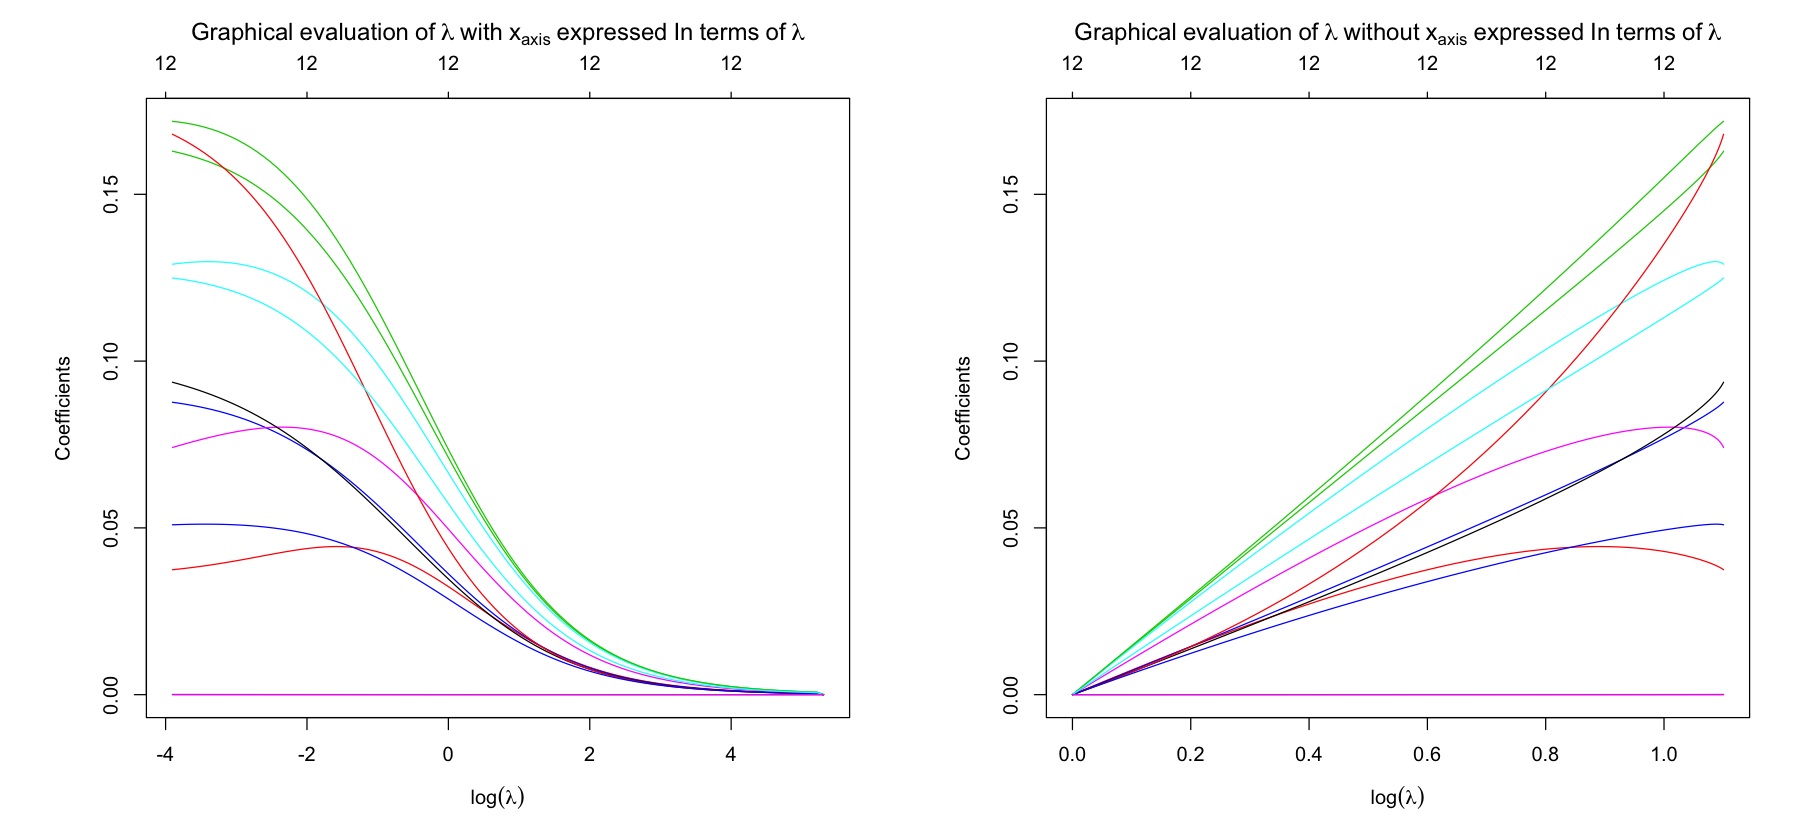

In [31]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.022 \
And the MSE is: 0.047

[1] 0.02214404

[1] 0.0466304

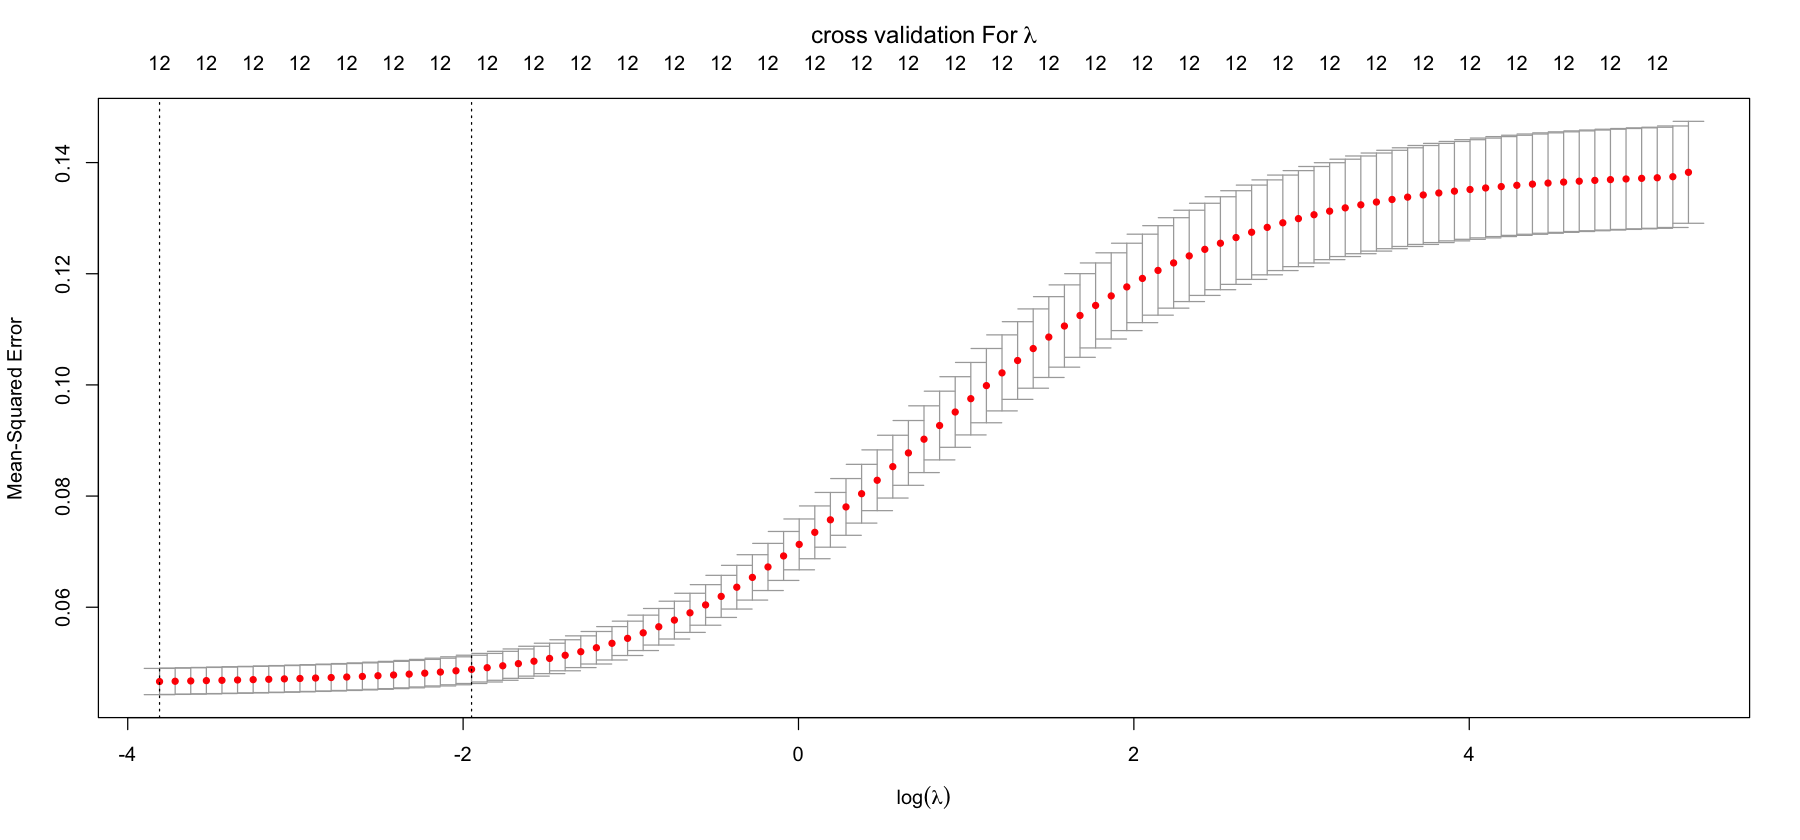

In [33]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0)
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=5E+8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.67


Call:  glmnet(x = X, y = y, alpha = 0, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 12 0.6773 0.02214

13 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)    1.003403e+01
lotsize        5.360012e-05
bedrooms       3.767670e-02
bathrooms      1.624803e-01
stories        8.735623e-02
drivewayyes    1.292270e-01
recreationyes  7.457605e-02
fullbaseyes    9.312721e-02
gasheatyes     1.670258e-01
airconyes      1.715925e-01
garage         5.098458e-02
preferyes      1.246735e-01
I(lotsize^2)  -4.175190e-10

[1] 0.6776268

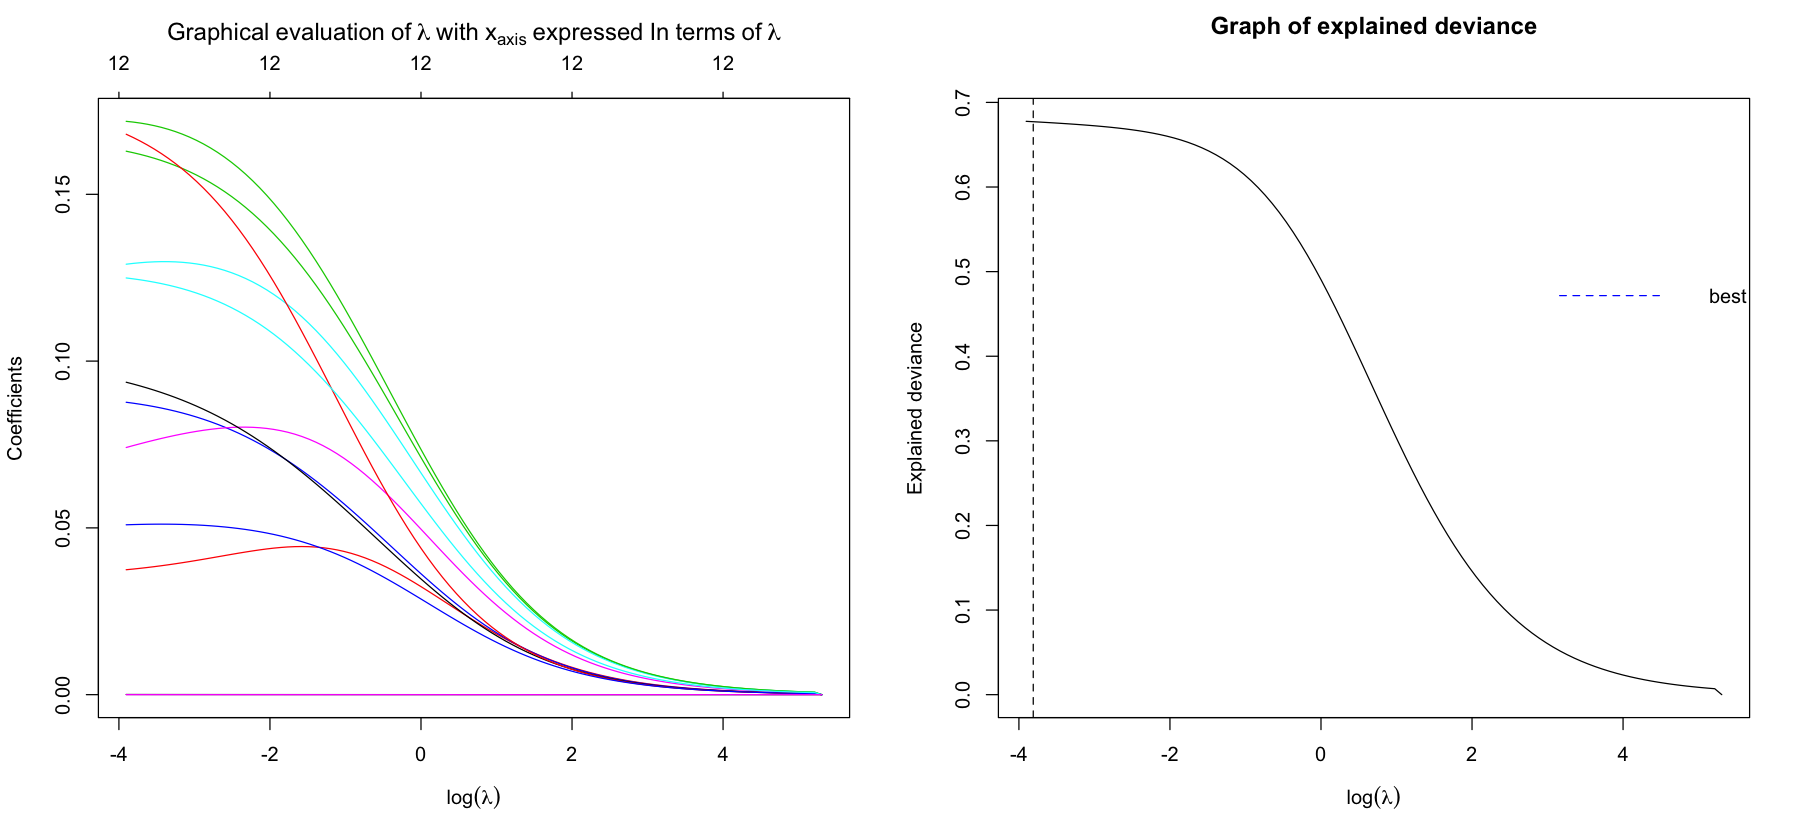

In [34]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,color="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO

Let's perform the analysis usign lasso

In [35]:
## lasso regression

library(glmnet)
m.lasso <- glmnet(X, y, alpha=1)
m.lasso


Call:  glmnet(x = X, y = y, alpha = 1) 

      Df    %Dev    Lambda
 [1,]  0 0.00000 0.2018000
 [2,]  1 0.05004 0.1838000
 [3,]  2 0.10400 0.1675000
 [4,]  3 0.16690 0.1526000
 [5,]  3 0.22830 0.1391000
 [6,]  4 0.28390 0.1267000
 [7,]  4 0.33190 0.1155000
 [8,]  4 0.37180 0.1052000
 [9,]  5 0.40660 0.0958600
[10,]  5 0.44000 0.0873400
[11,]  7 0.47150 0.0795800
[12,]  8 0.49960 0.0725100
[13,] 10 0.52450 0.0660700
[14,] 10 0.54870 0.0602000
[15,] 10 0.56880 0.0548500
[16,] 10 0.58540 0.0499800
[17,] 10 0.59930 0.0455400
[18,] 10 0.61070 0.0414900
[19,] 10 0.62030 0.0378100
[20,] 11 0.62890 0.0344500
[21,] 11 0.63700 0.0313900
[22,] 11 0.64370 0.0286000
[23,] 11 0.64930 0.0260600
[24,] 11 0.65390 0.0237400
[25,] 11 0.65780 0.0216300
[26,] 11 0.66100 0.0197100
[27,] 11 0.66360 0.0179600
[28,] 11 0.66580 0.0163700
[29,] 11 0.66770 0.0149100
[30,] 11 0.66920 0.0135900
[31,] 11 0.67040 0.0123800
[32,] 11 0.67150 0.0112800
[33,] 11 0.67230 0.0102800
[34,] 11 0.67310 0.0093650
[35,] 11 0.67

The output reports the value fo the deviance for each value of $\lambda$.

The output reports the value fo the deviance for each value of $ \lambda$ .
We have considered 73 $ \lambda$.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 11 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:11 is not repeated, as lasso regression is a selection method.


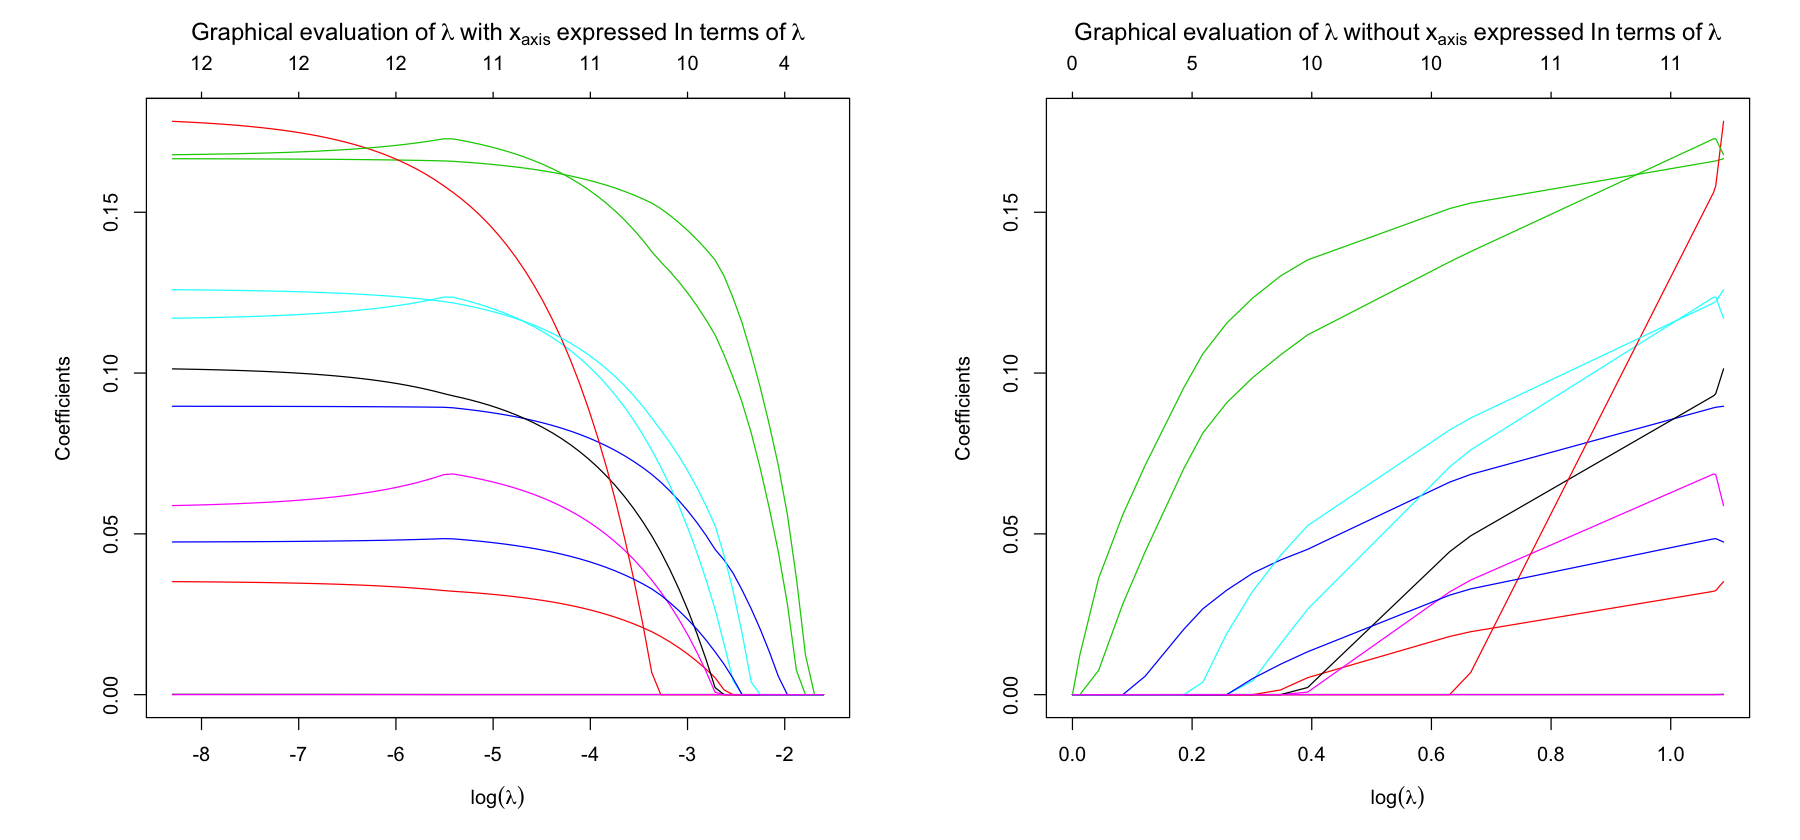

In [36]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.0003 \
And the MSE is: 0.46

[1] 0.0002996194

[1] 0.04600992

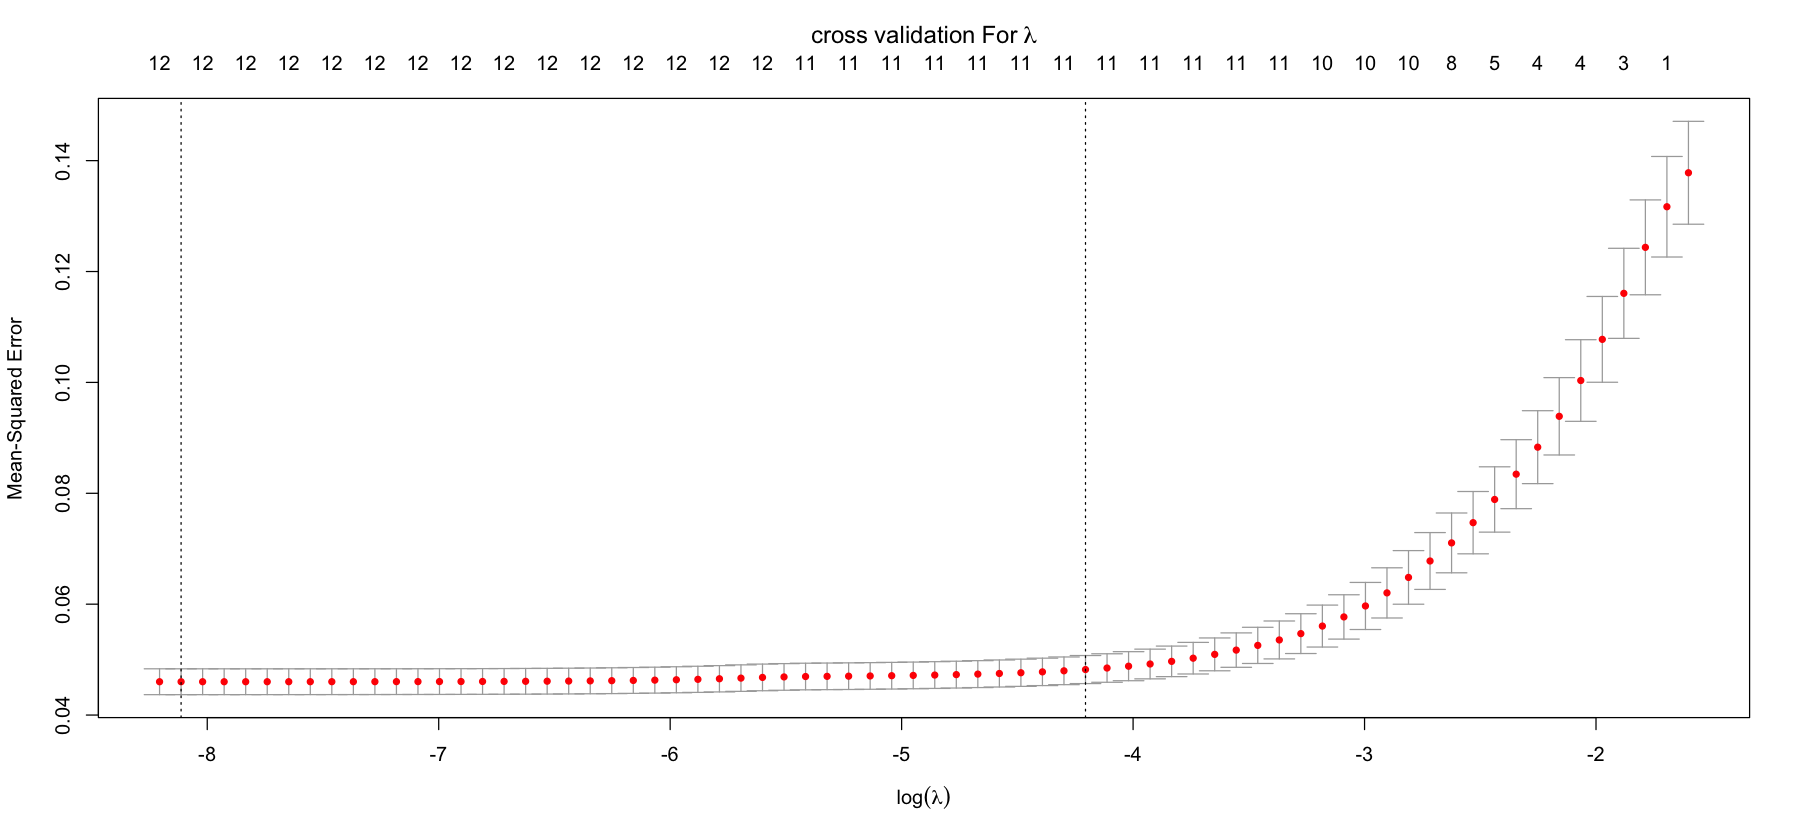

In [38]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1)
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min)+0.5, y=5E+8, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse


On the basis of MSE , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.68 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular the are not coefficients equal to 0.


Call:  glmnet(x = X, y = y, alpha = 1, lambda = best.lambda) 

     Df   %Dev    Lambda
[1,] 12 0.6833 0.0002996

13 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)    9.904388e+00
lotsize        1.006142e-04
bedrooms       3.511060e-02
bathrooms      1.666383e-01
stories        8.967125e-02
drivewayyes    1.171354e-01
recreationyes  5.891932e-02
fullbaseyes    1.011955e-01
gasheatyes     1.780071e-01
airconyes      1.679623e-01
garage         4.749758e-02
preferyes      1.258802e-01
I(lotsize^2)  -3.662071e-09

[1] 13

[1] 0.6832974

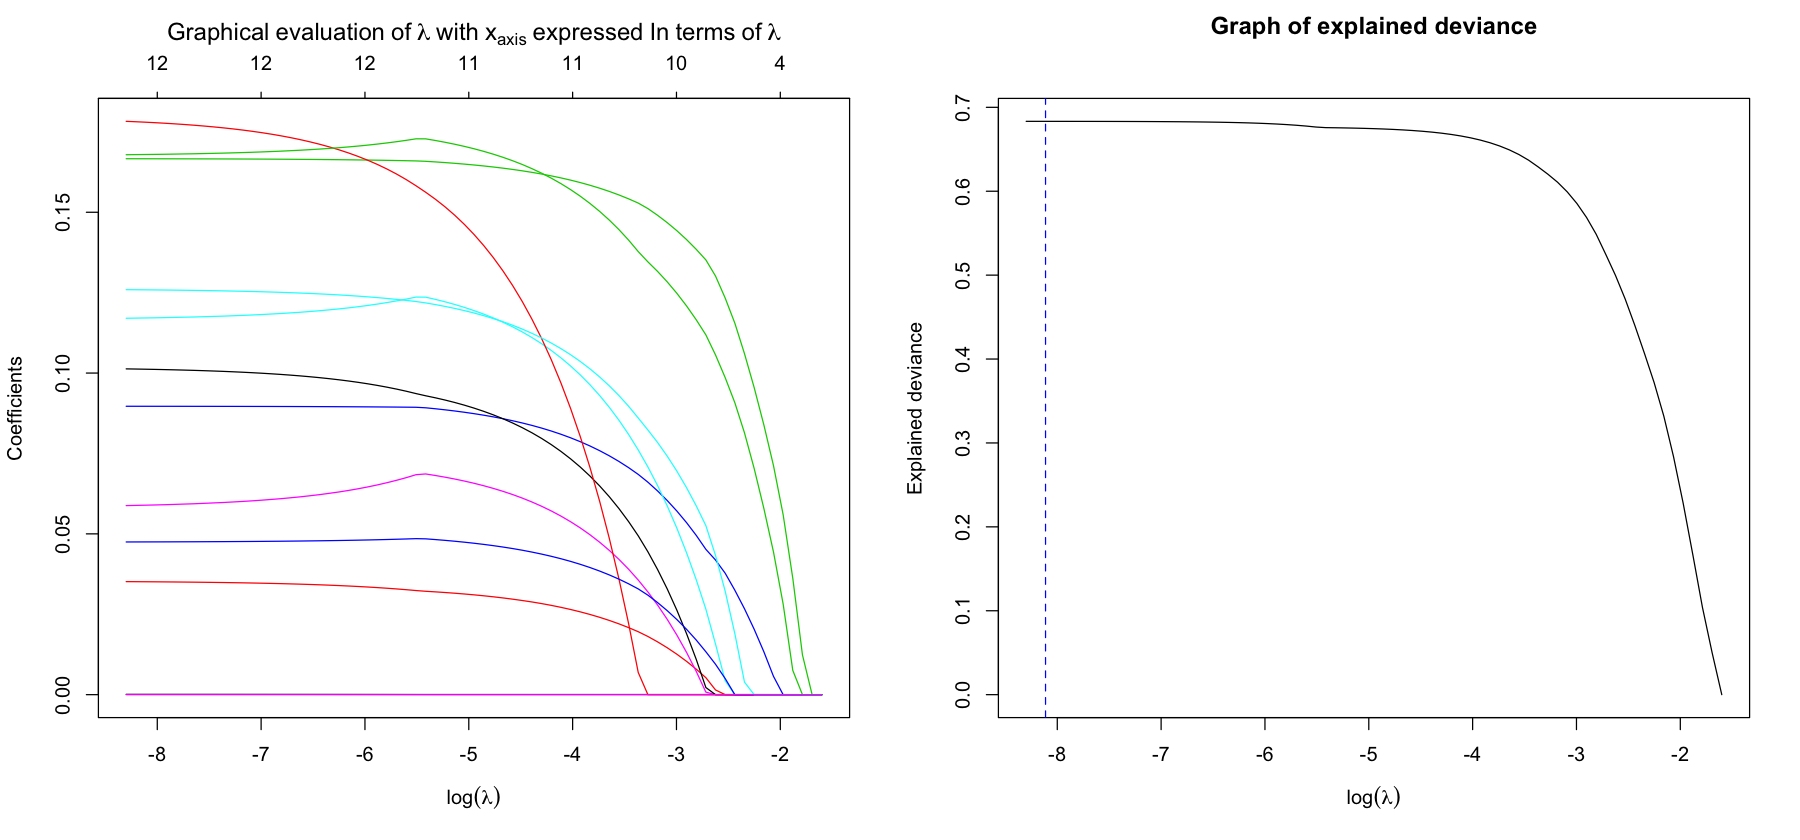

In [40]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda)
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 3,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

In the following plot there is the comparison of prediction  with lasso and ridge.

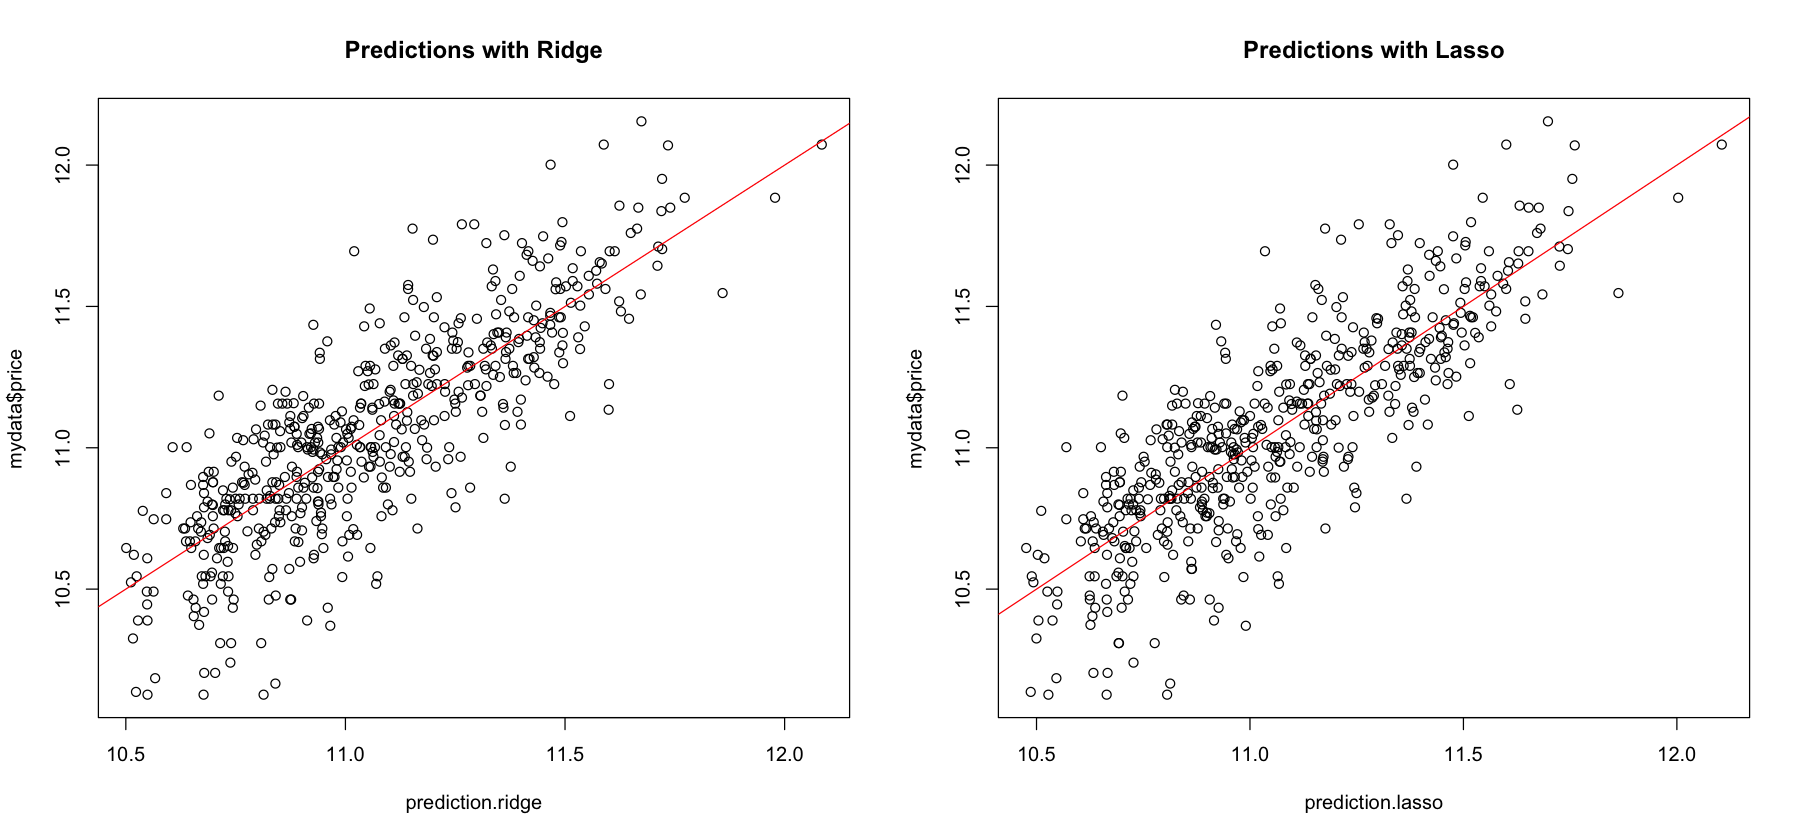

In [41]:
prediction.ridge <- predict(m.ridge.min, newx=X)
prediction.lasso <- predict(m.lasso.min, newx=X)

par(mfrow=c(1,2))
plot(prediction.ridge, mydata$price,
       main='Predictions with Ridge')
abline(0,1,col="red")
plot(prediction.lasso, mydata$price,
     main='Predictions with Lasso')
abline(0,1,col="red")

Compare the results with those from the linear model.
We have that :
- MSE for lasso is:0.46
- MSE for linear model is:0.46
 
No net difference. But since there is no substantial variable selection, it does not seem to be so interesting.

In [43]:
m.glm <- glm(price ~ .+I(lotsize^2), data=mydata)
library(boot)
set.seed(222)
m.glm.cv <- cv.glm(mydata, m.glm)
m.glm.cv$delta

[1] 0.04610335 0.04610112

### AUTOMATIC SELECTION

#### FORWARD SELECTION

In [45]:
library(leaps)
m.forward <- regsubsets(price ~ .+I(lotsize^2), data=mydata, nvmax=12, method='forward')
summary(m.forward )

Subset selection object
Call: regsubsets.formula(price ~ . + I(lotsize^2), data = mydata, nvmax = 12, 
    method = "forward")
12 Variables  (and intercept)
              Forced in Forced out
lotsize           FALSE      FALSE
bedrooms          FALSE      FALSE
bathrooms         FALSE      FALSE
stories           FALSE      FALSE
drivewayyes       FALSE      FALSE
recreationyes     FALSE      FALSE
fullbaseyes       FALSE      FALSE
gasheatyes        FALSE      FALSE
airconyes         FALSE      FALSE
garage            FALSE      FALSE
preferyes         FALSE      FALSE
I(lotsize^2)      FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: forward
          lotsize bedrooms bathrooms stories drivewayyes recreationyes
1  ( 1 )  "*"     " "      " "       " "     " "         " "          
2  ( 1 )  "*"     " "      "*"       " "     " "         " "          
3  ( 1 )  "*"     " "      "*"       " "     " "         " "          
4  ( 1 )  "*"     " "      "*"       "*"   

In [48]:
## BIC and RSS

#rss
which.min(summary(m.forward)$rss)


# BIc
which.min(summary(m.forward)$bic)


## variance and sd for the estimators




[1] 12

[1] 10


- the model with the smallest RSS is the model with 12 covariates
- usign BIC instead the best model includes 9 covariates

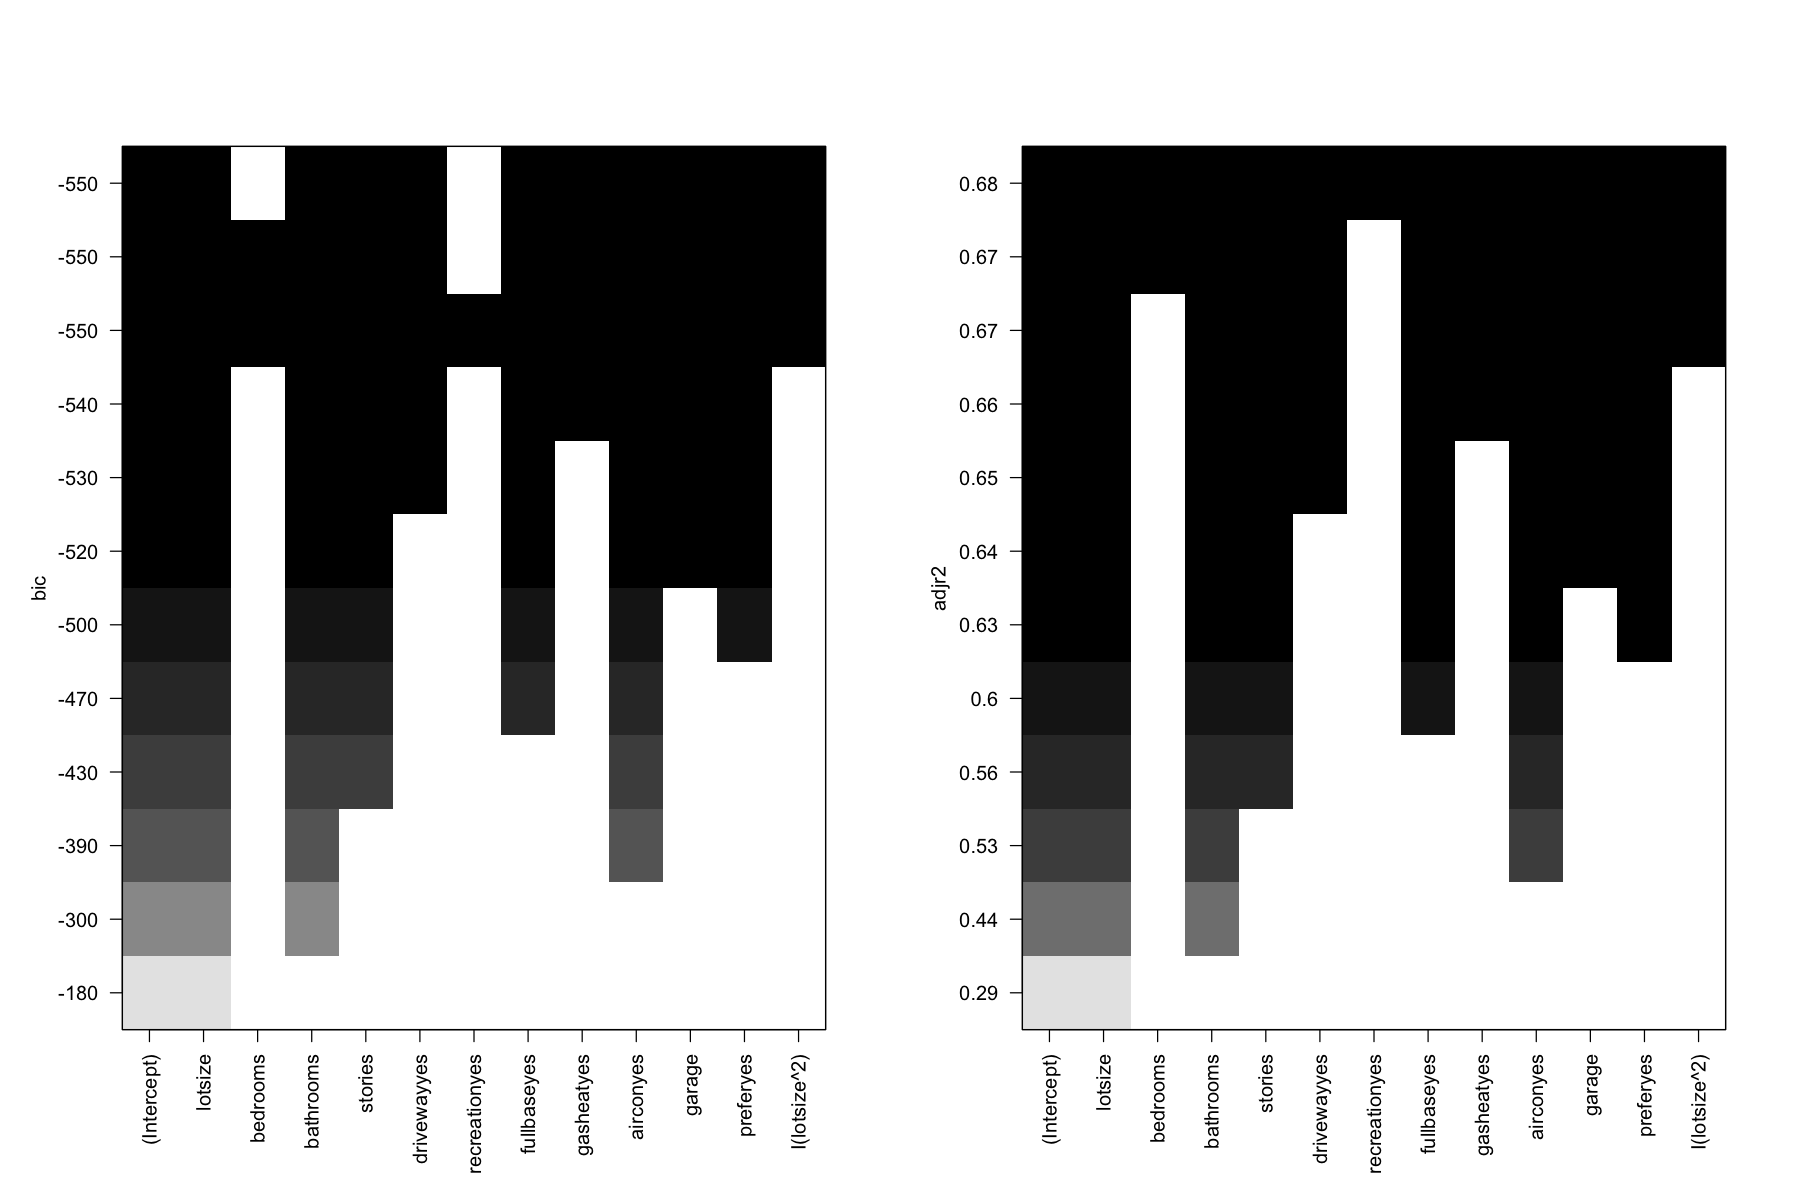

In [49]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.forward)
plot(m.forward, scale='adjr2')

we see as computed before that the best model basing on BIC is 9

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 12 for adjr2 and 10 for BIC"

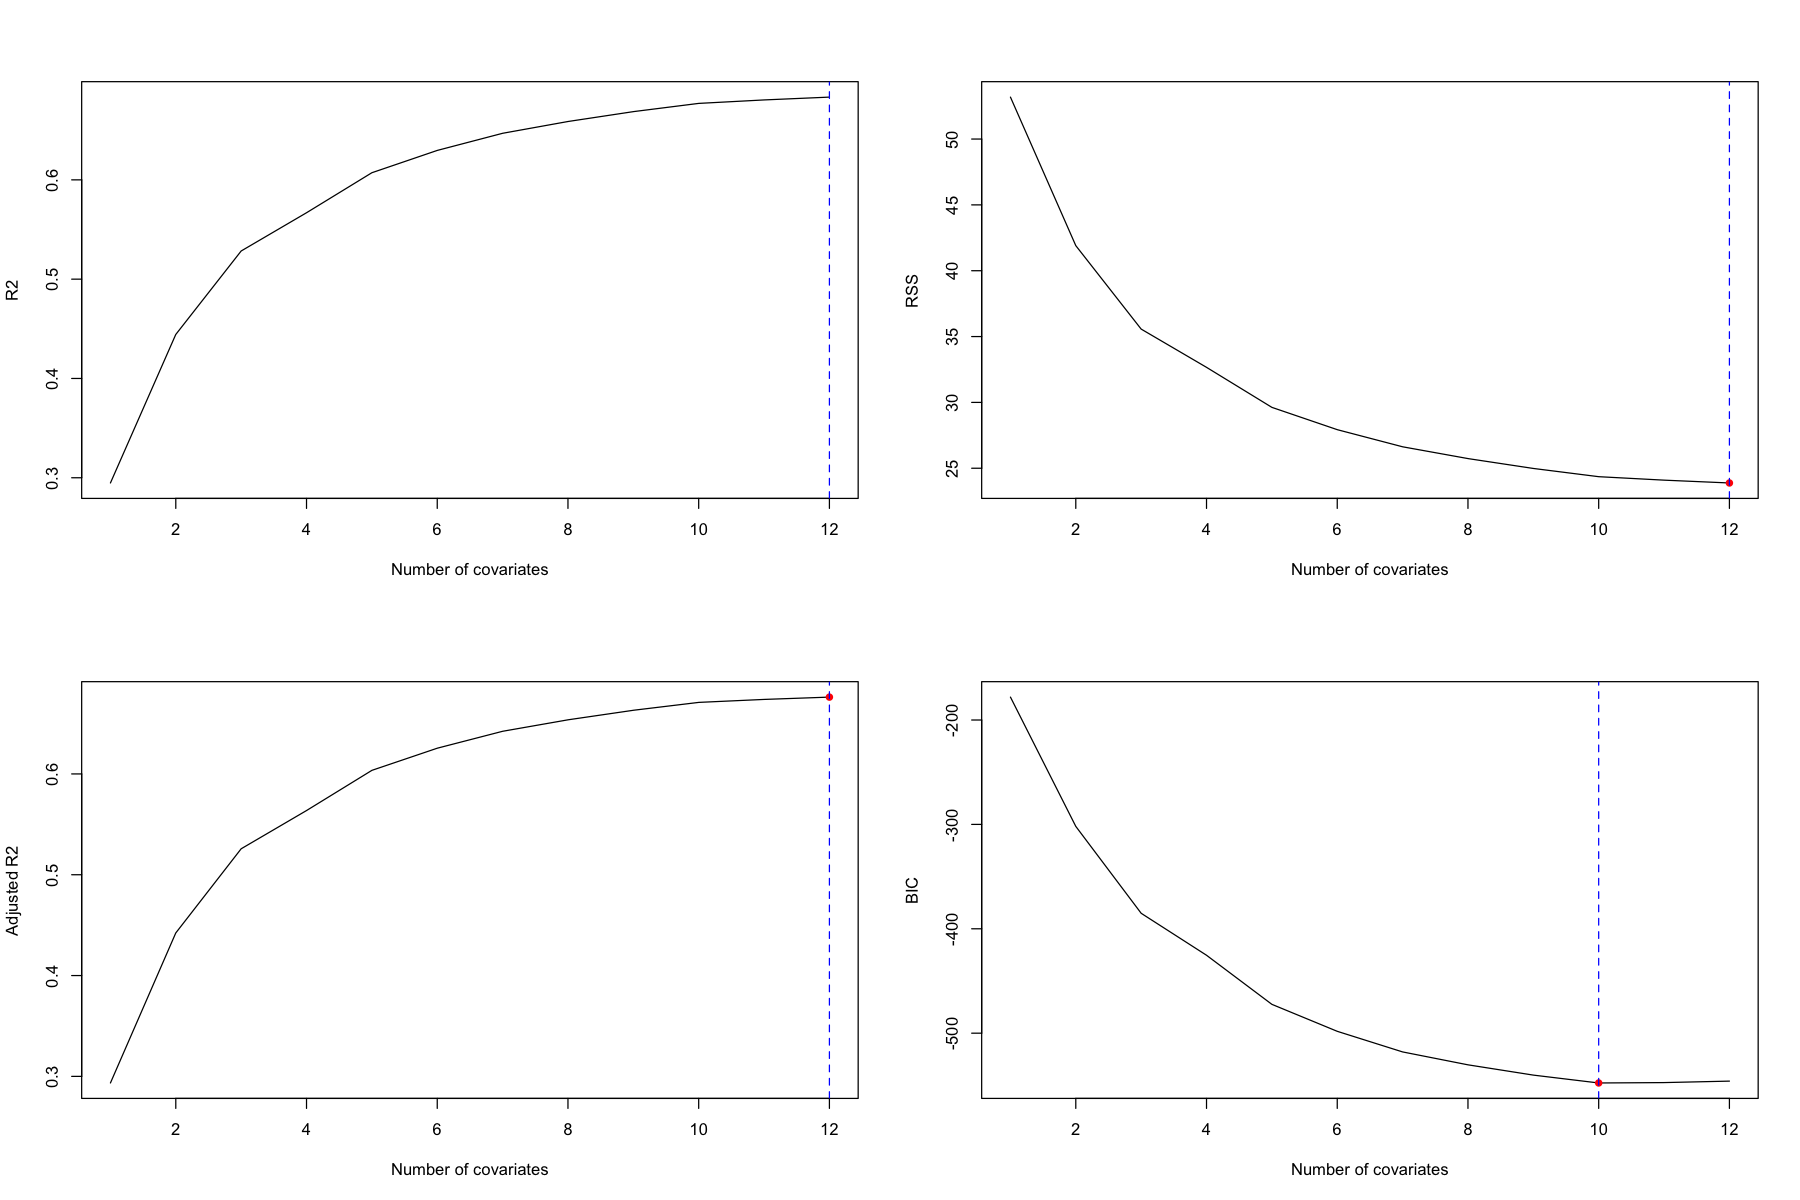

In [50]:
par(mfrow=c(2,2))
## R2
plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.forward)$rsq)
#points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.forward)$rss)
points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.forward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.forward)$adjr2)
points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.forward)$bic)
points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

base on BIC we keep the model with the lowest BIC so with a number of covariates equal to : 9


Call:
lm(formula = price ~ . - recreation - bedrooms, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71484 -0.11976  0.00921  0.13366  0.68433 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.008e+01  3.823e-02 263.717  < 2e-16 ***
lotsize     5.264e-05  4.869e-06  10.809  < 2e-16 ***
bathrooms   1.811e-01  2.030e-02   8.923  < 2e-16 ***
stories     1.047e-01  1.210e-02   8.656  < 2e-16 ***
drivewayyes 1.254e-01  2.841e-02   4.416 1.22e-05 ***
fullbaseyes 1.277e-01  2.061e-02   6.194 1.17e-09 ***
gasheatyes  1.806e-01  4.503e-02   4.011 6.90e-05 ***
airconyes   1.819e-01  2.171e-02   8.380 4.67e-16 ***
garage      5.135e-02  1.172e-02   4.381 1.42e-05 ***
preferyes   1.309e-01  2.334e-02   5.610 3.24e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2159 on 536 degrees of freedom
Multiple R-squared:  0.6687,	Adjusted R-squared:  0.6631 
F-statistic: 120.2 on 9 and 536 D

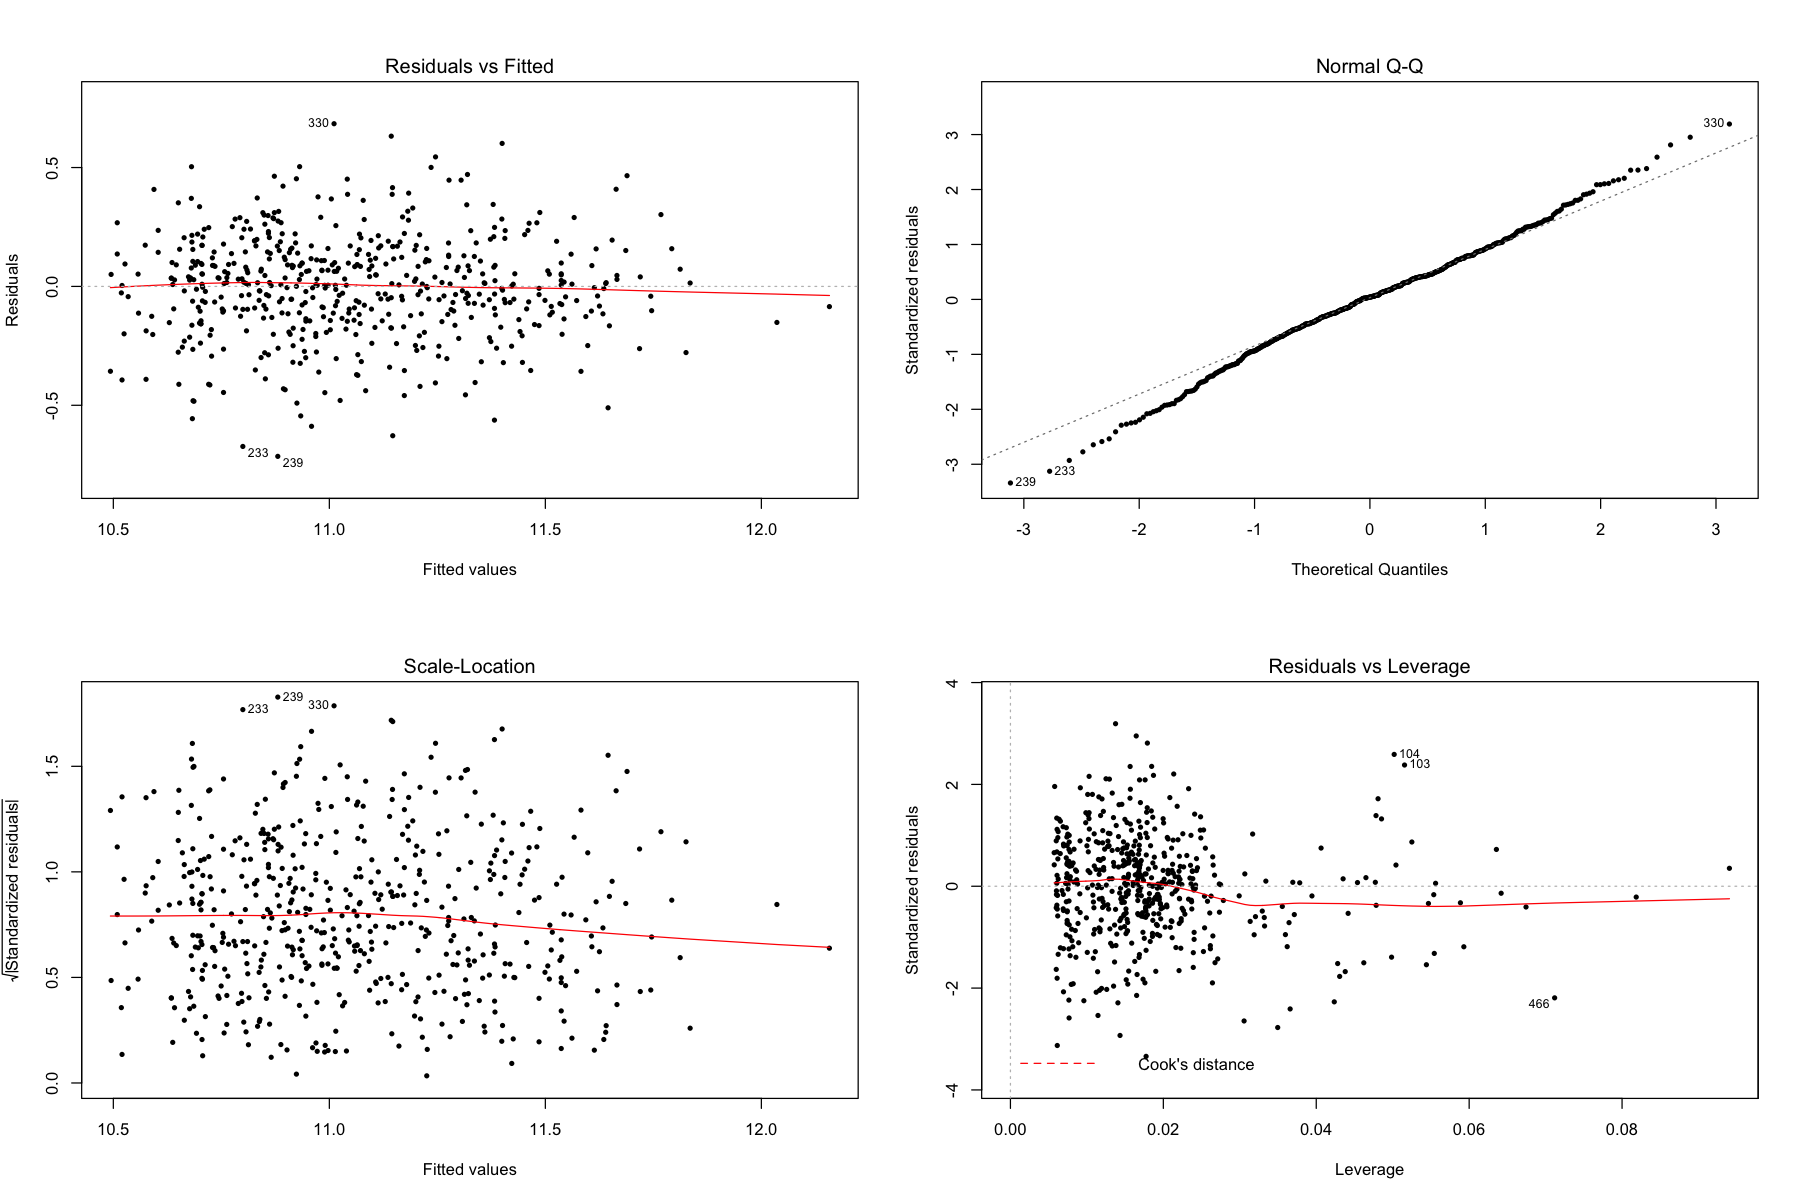

In [51]:
model.bic <- lm(price ~ . - recreation - bedrooms, data=mydata)
summary(model.bic)
par(mfrow=c(2,2))
plot(model.bic, pch=16, cex=0.7)

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large. 

In [ ]:
## FORWARD MSE
m.glm <- lm(felice ~ vita+reddito.distr+pilc, data=mydata)
p.mglm=predict(m.glm,newdata=mydata)
rmse <- sqrt(mean((mydata$felice - p.mglm)^2))
rmse 

### BACKWORD SELECTION

(Intercept)      lotsize    bathrooms      stories  drivewayyes  fullbaseyes 
1.008114e+01 5.263518e-05 1.811170e-01 1.047225e-01 1.254473e-01 1.276546e-01 
  gasheatyes    airconyes       garage    preferyes 
1.806219e-01 1.819047e-01 5.135409e-02 1.309380e-01

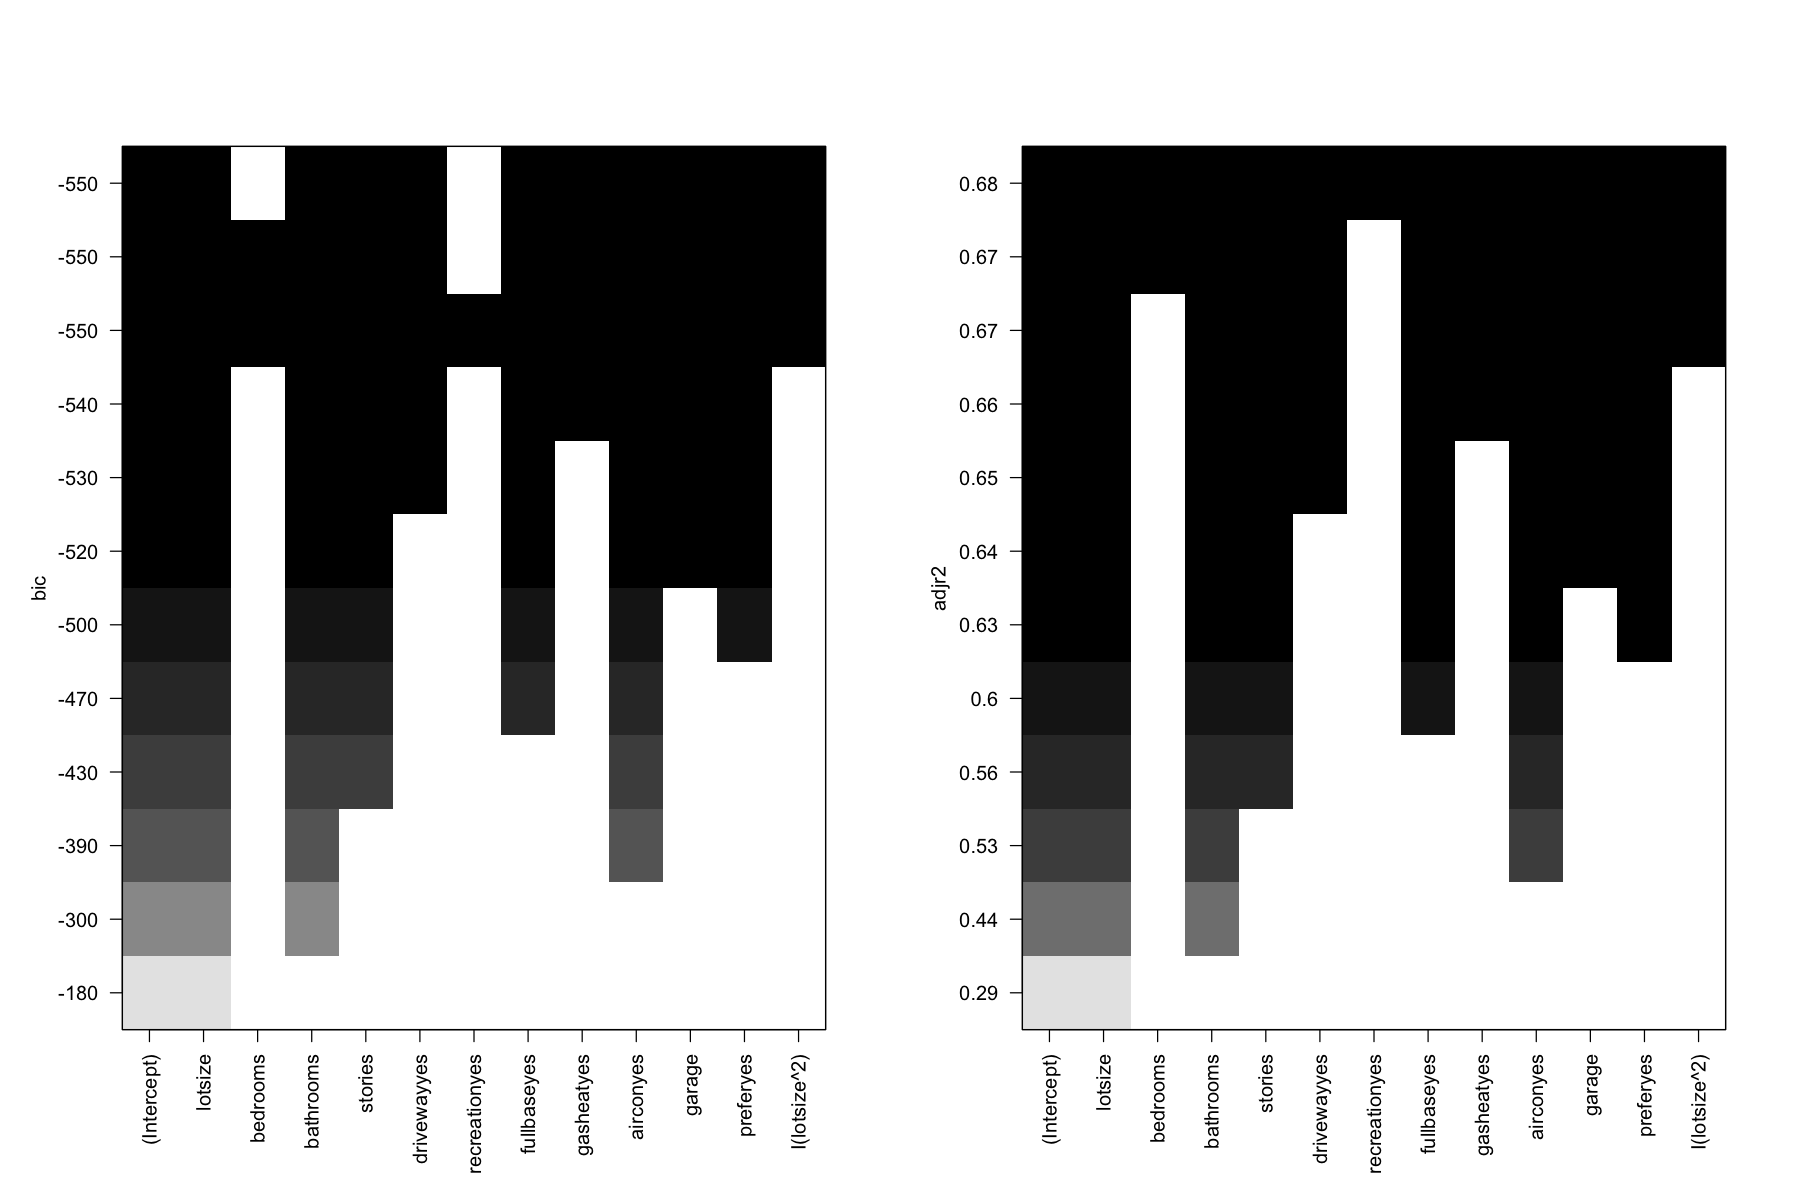

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 12 for adjr2 and 10 for BIC"

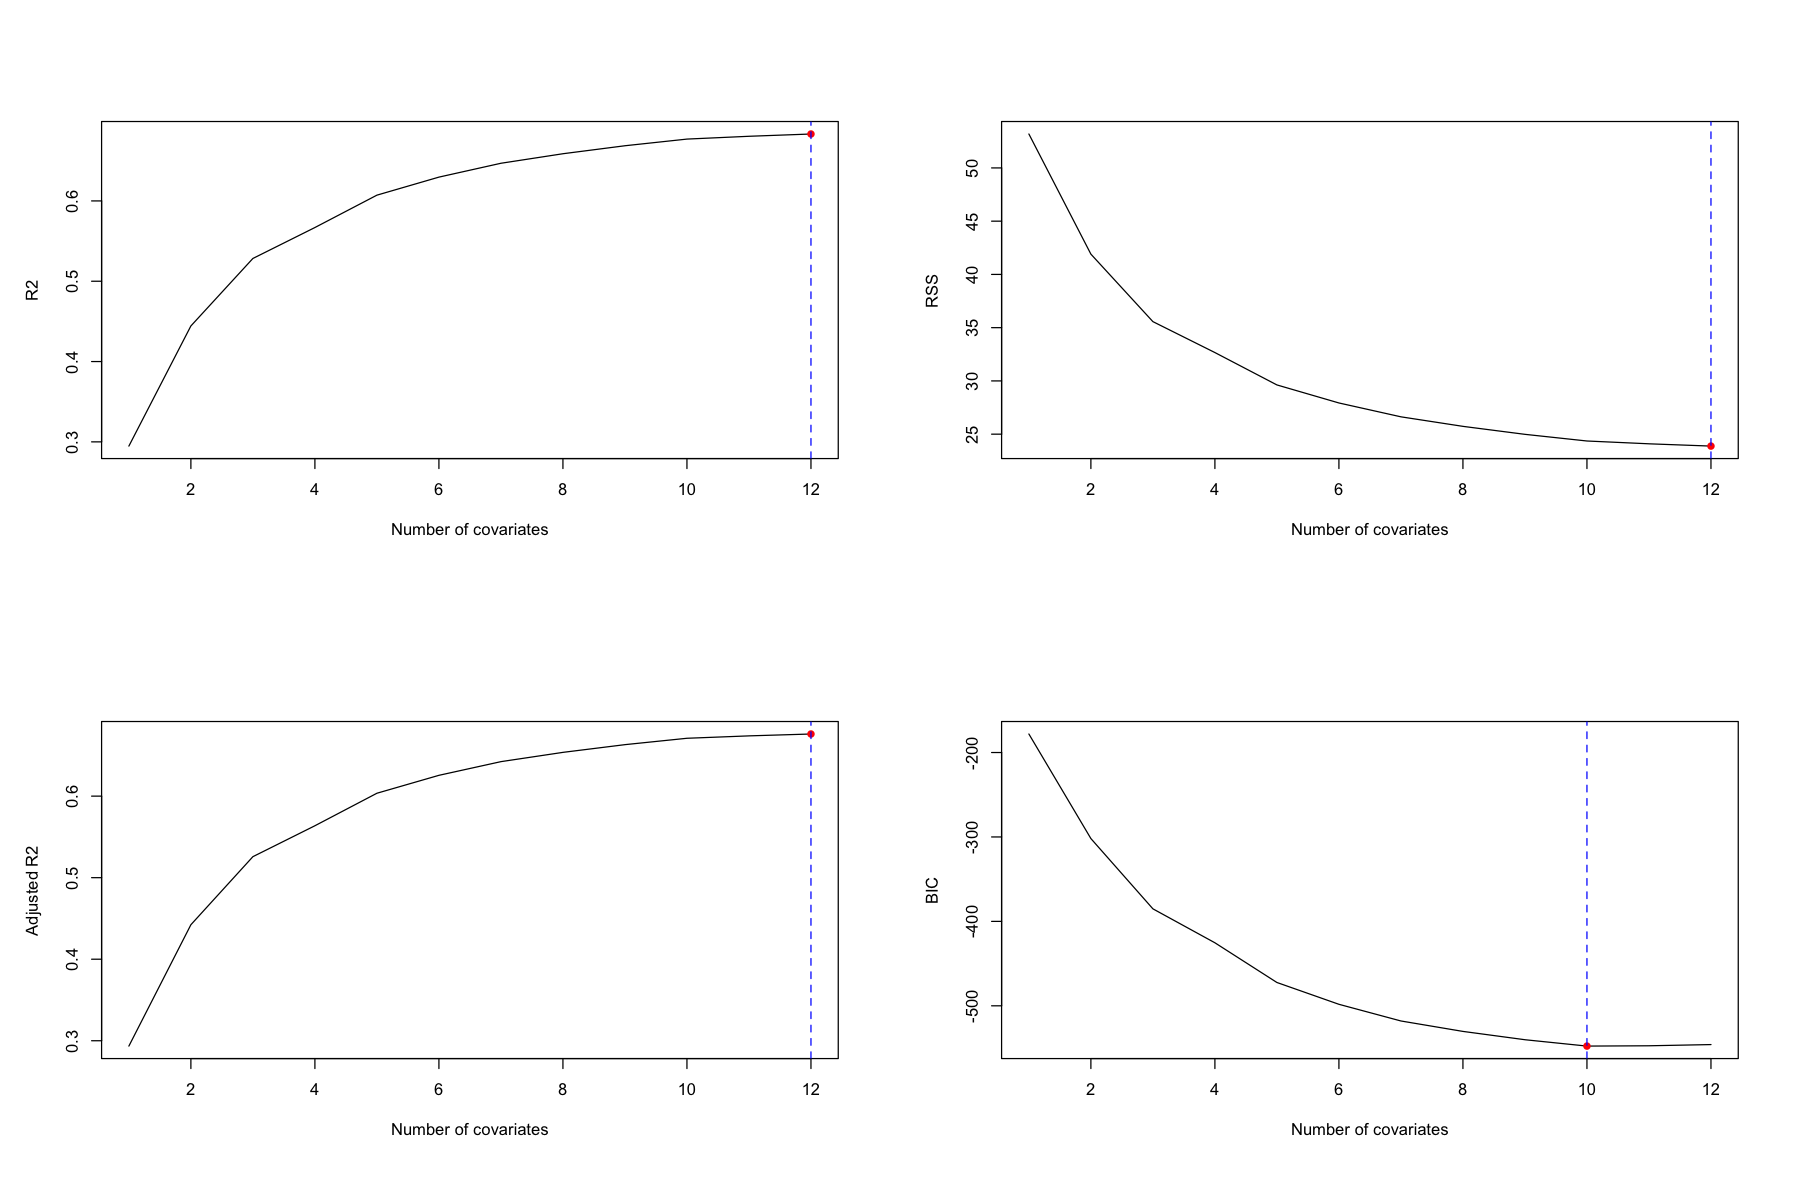

In [52]:
m.backward <- regsubsets(price ~ . + I(lotsize^2), data=mydata, nvmax=19, method='backward')
#plot(m.backward)

coef(m.backward,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.backward)
plot(m.backward, scale='adjr2')
par(mfrow=c(2,2))
## R2
plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.backward)$rsq)
points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.backward)$rss)
points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.backward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.backward)$adjr2)
points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.backward)$bic)
points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

As you can see, forward and backward give us the same amount of covariates based on BIC. In fact in this case we have 9 covariates

### MIXED SELECTION

(Intercept)      lotsize    bathrooms      stories  drivewayyes  fullbaseyes 
1.008114e+01 5.263518e-05 1.811170e-01 1.047225e-01 1.254473e-01 1.276546e-01 
  gasheatyes    airconyes       garage    preferyes 
1.806219e-01 1.819047e-01 5.135409e-02 1.309380e-01

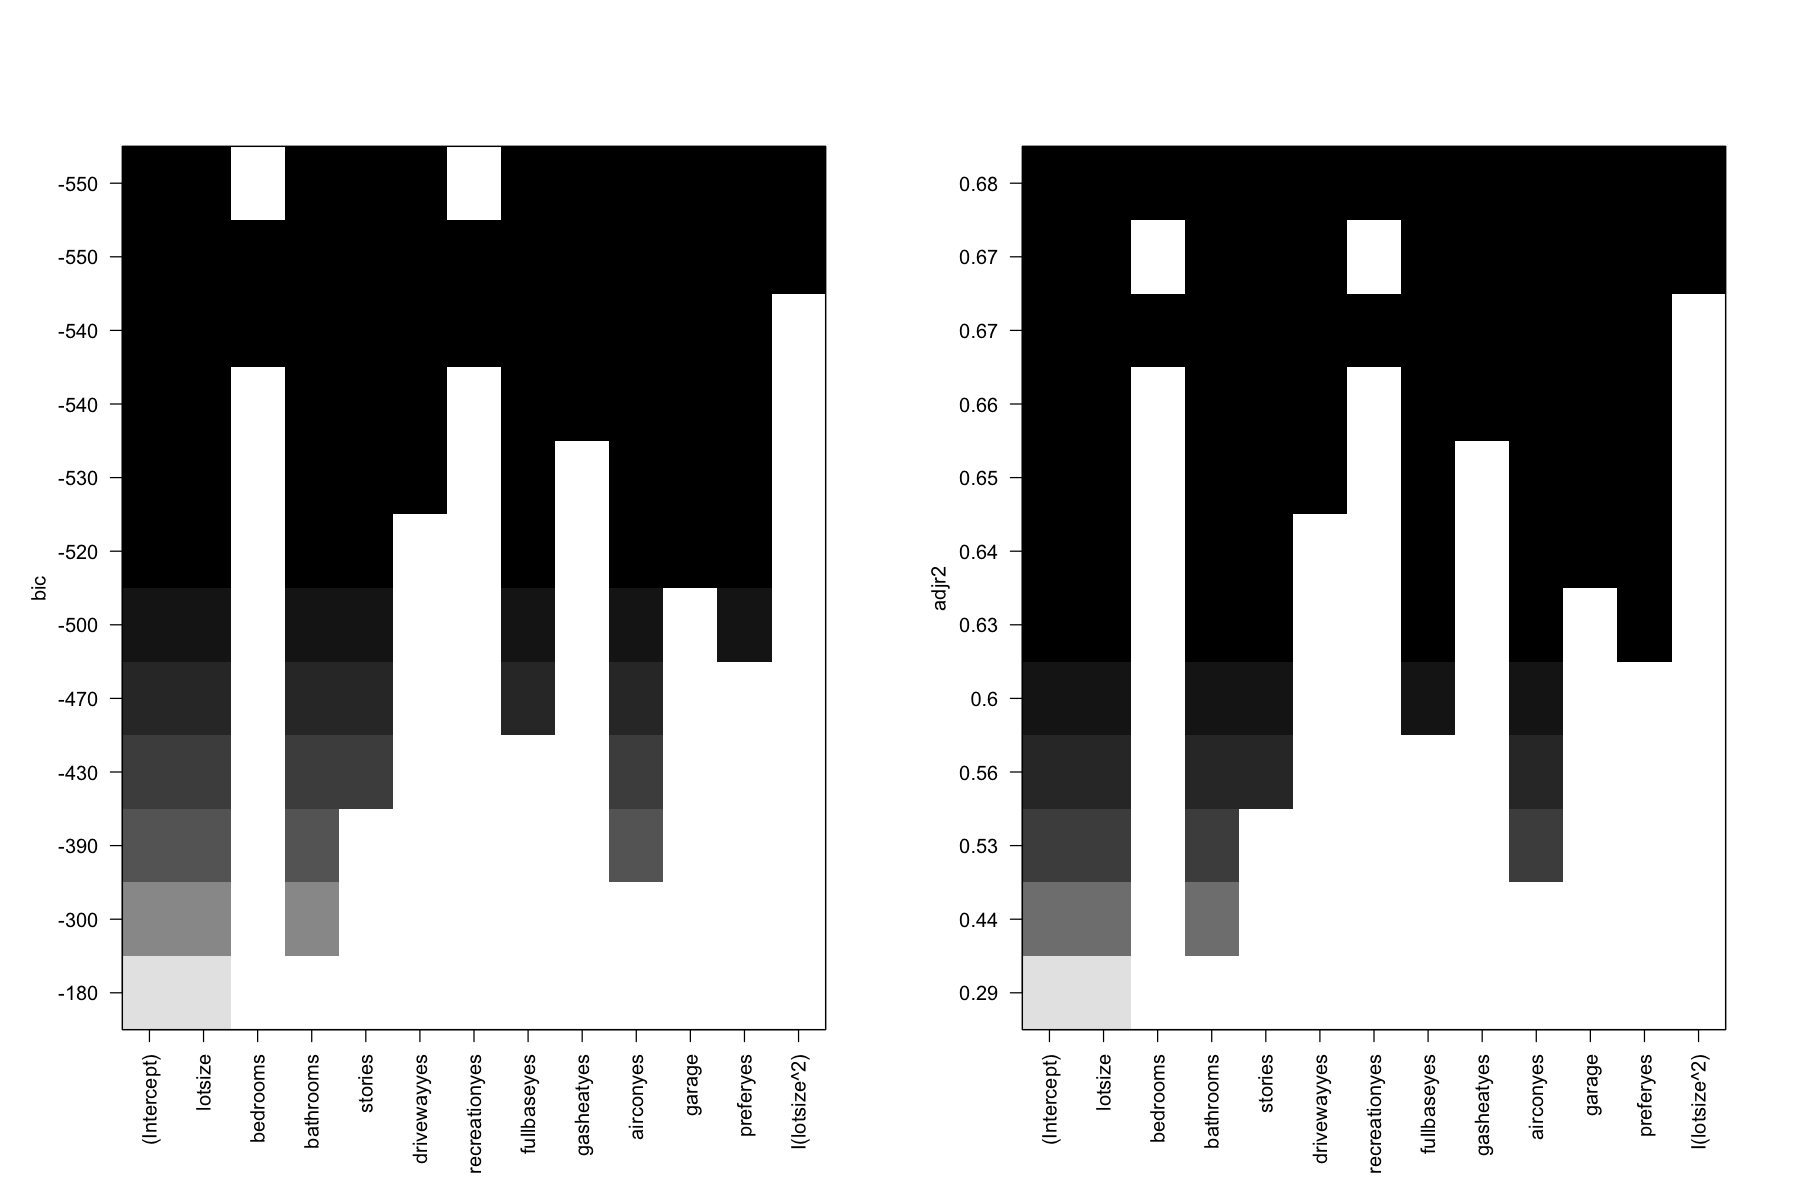

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 12 for adjr2 and 10 for BIC"

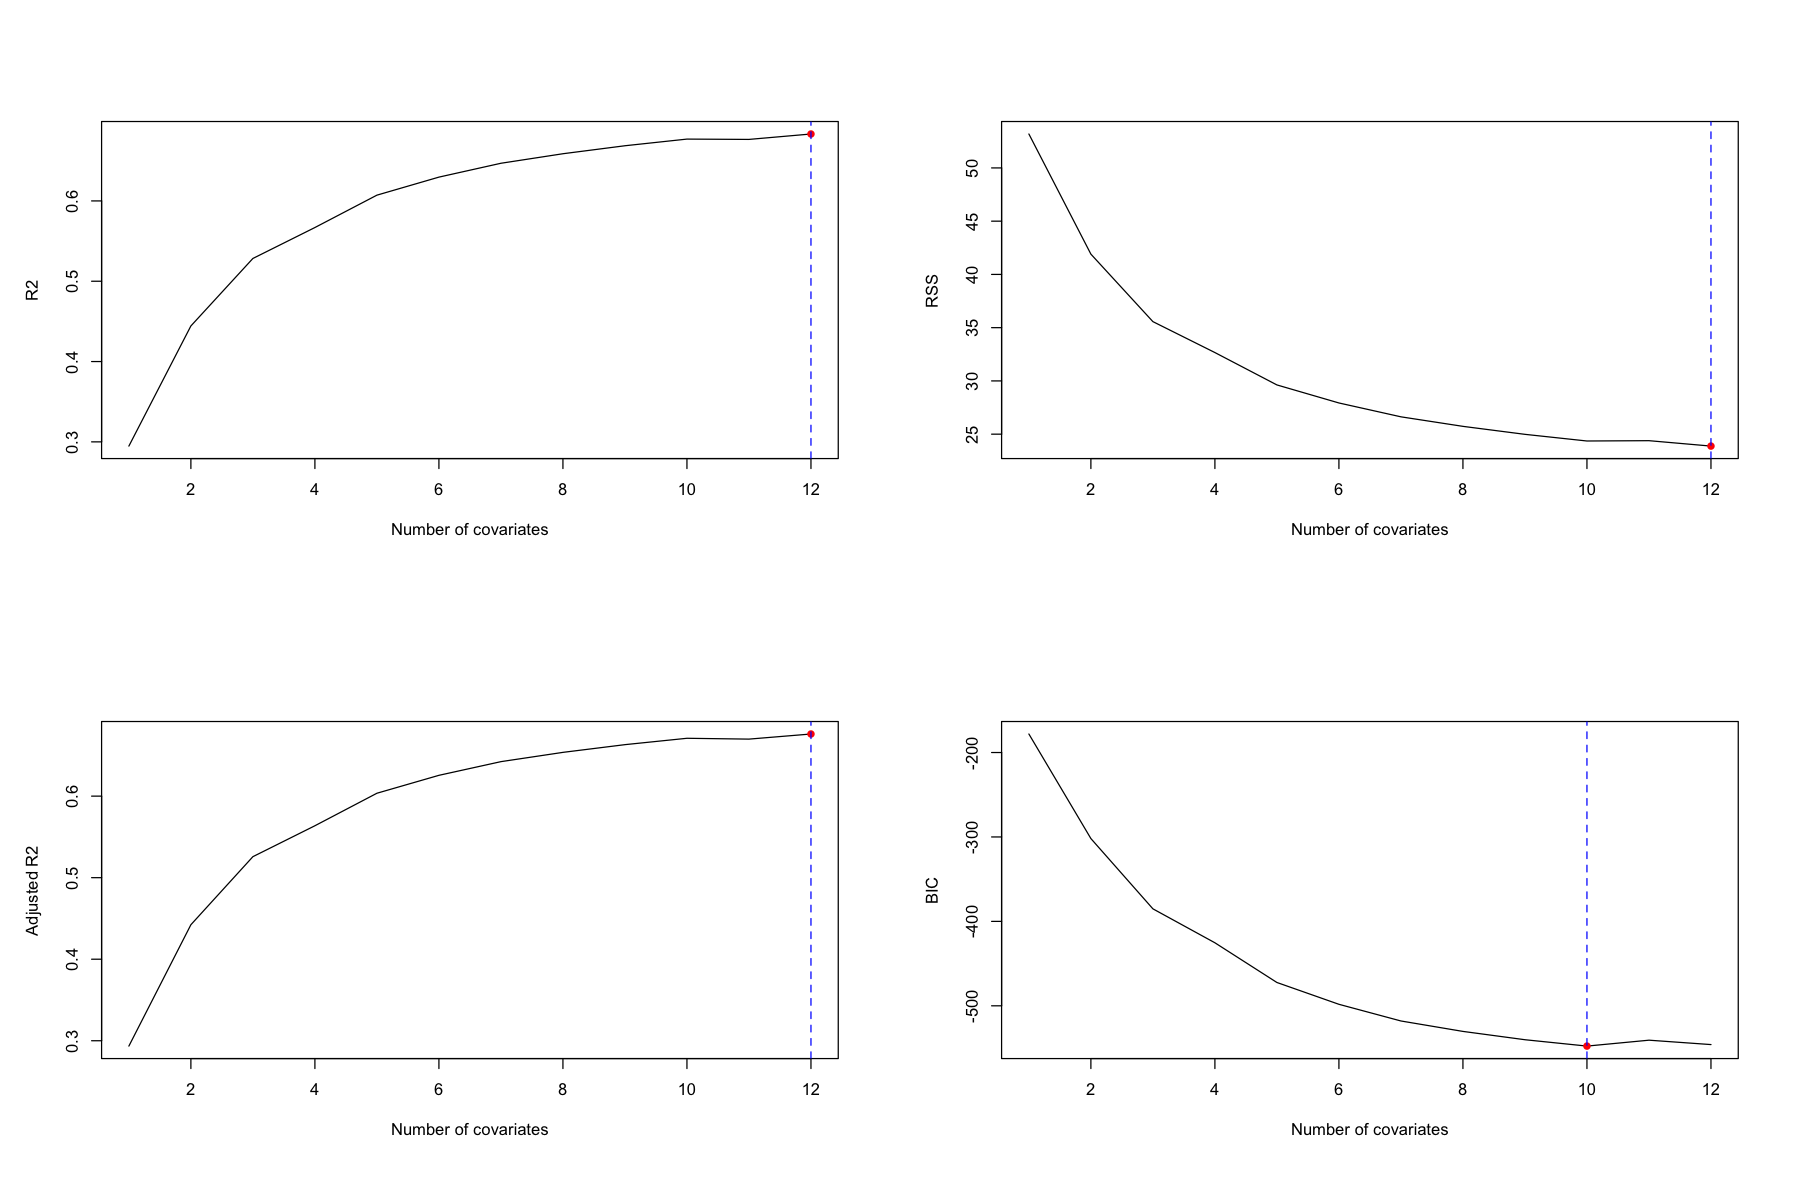

In [53]:
m.seqrep <- regsubsets(price ~ .+ I(lotsize^2), data=mydata, nvmax=19, method='seqrep')

coef(m.seqrep,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.seqrep)
plot(m.seqrep, scale='adjr2')

par(mfrow=c(2,2))
## R2
plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.seqrep)$rsq)
points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.seqrep)$rss)
points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.seqrep)$bic)
points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


As we can see,  in this case we have 9 covariates again based on BIC.

### PRINCIPAL COMPONENT ANALYSIS

Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222.

In [54]:
## PCA
library(pls)
set.seed(222)
#mydata <- data.frame(sapply(mydata, as.numeric))[- valore colonna Y] se proprio sei disperato
m.pcr <- pcr(price ~ .+I(lotsize^2), scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 546 12 
	Y dimension: 546 1
Fit method: svdpc
Number of components considered: 12

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.3723   0.2376   0.2283   0.2253   0.2260   0.2224   0.2220
adjCV       0.3723   0.2374   0.2281   0.2251   0.2258   0.2221   0.2218
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps
CV      0.2224   0.2205   0.2187    0.2185    0.2178    0.2140
adjCV   0.2222   0.2202   0.2183    0.2183    0.2176    0.2137

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        23.21    36.69    48.67    58.16    66.09    73.19    79.86    86.01
price    59.52    62.93    63.95    63.96    65.18    65.33    65.38    66.03
       9 comps  10 comps  11 comps  12 comps
X        91.24     96.19     99.73    100.00
price    66.75     66.78     67.00     68.33


The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs. -Choose the optimum through a graphical inspection of the results considering MSE and $R^{2}$.
We see that the  number of PCs needed is:  12
While the best number of components we can use for the analysis is :5
We also have that the value of MSE is reported below.

In [55]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=12))

       (Intercept)  5 comps
CV          0.1386  0.04944
adjCV       0.1386  0.04935

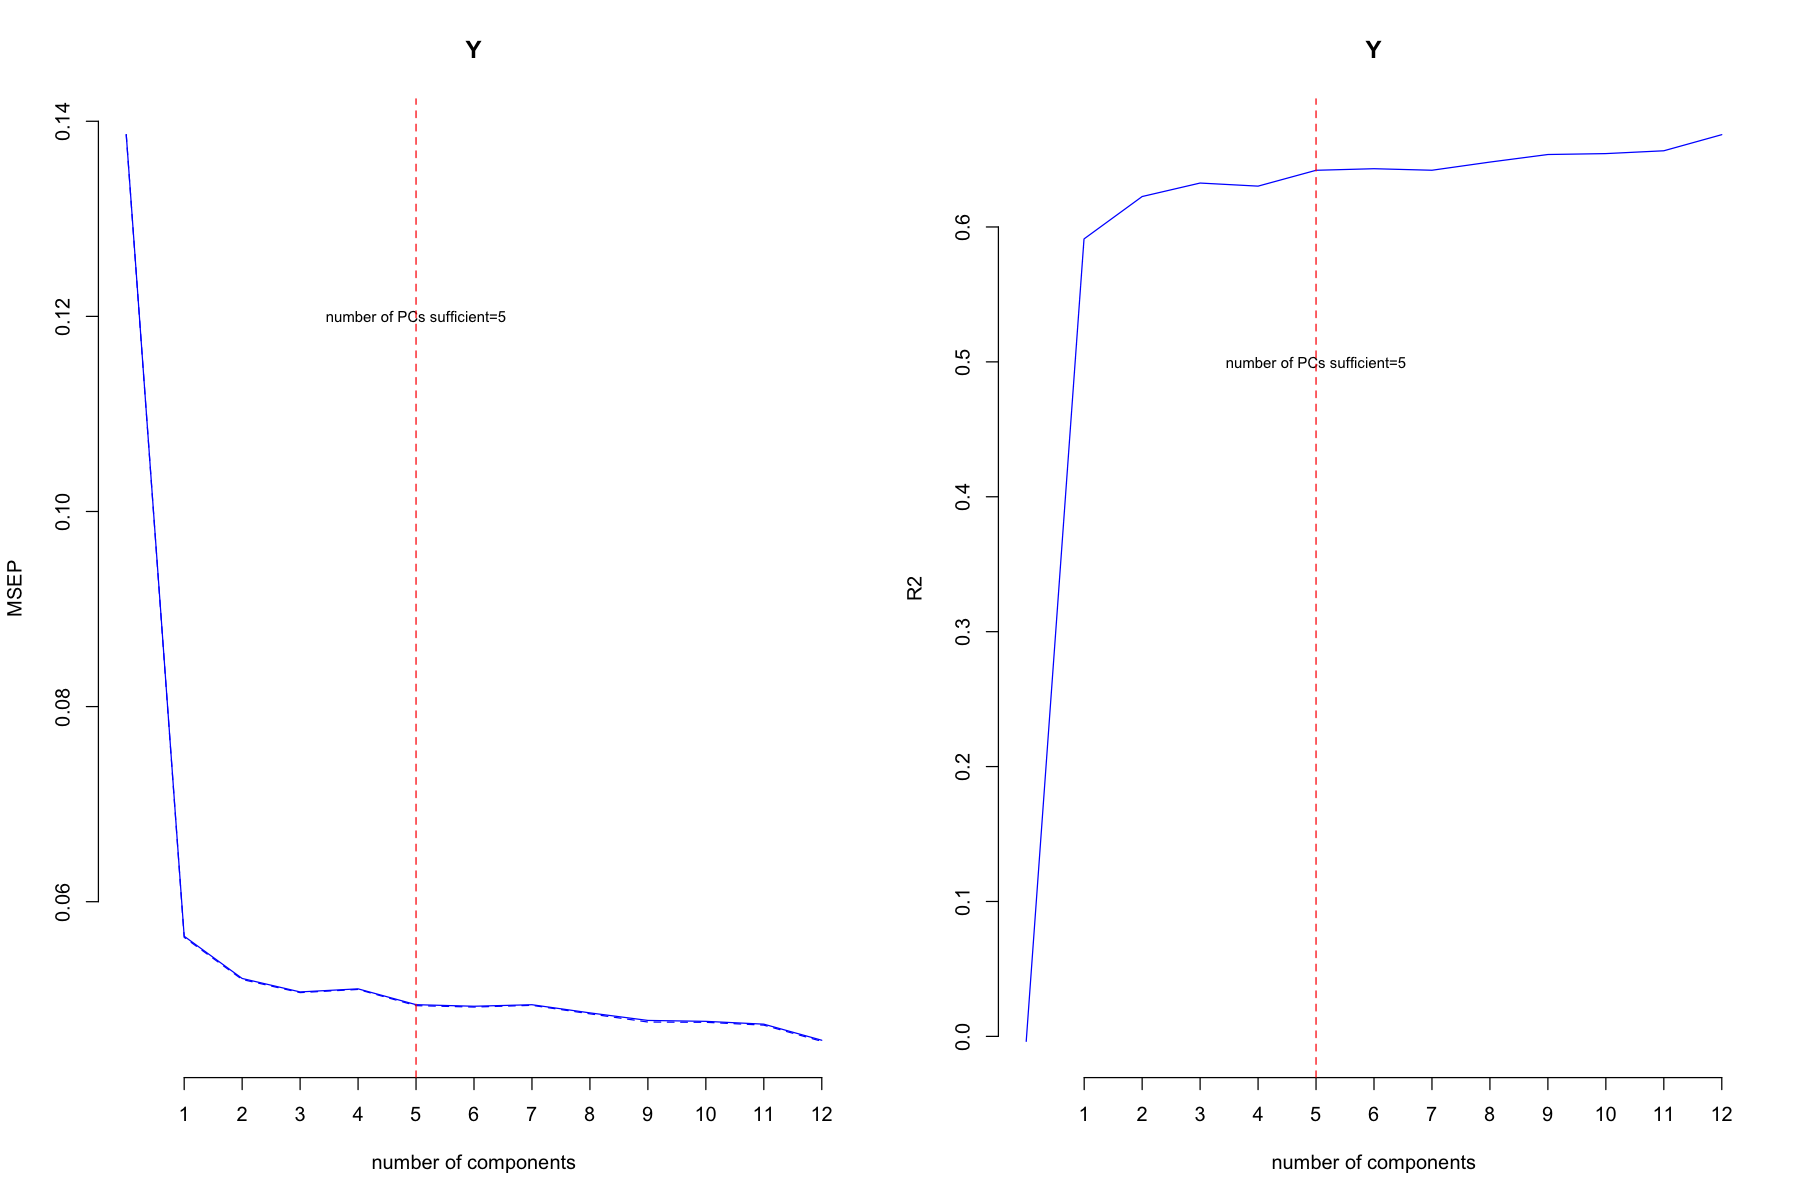

In [57]:

par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Y', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:12)
## add on the y-axis
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=12), y=0.12,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Y', axes=FALSE,col="blue")
axis(1, at=1:12)
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=12), y=0.5,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)

Let's look how much variance is explained by the 12 components.
While te explained variance for our 5 PCs obtained before is: 67%

Comp 1     Comp 2     Comp 3     Comp 4     Comp 5     Comp 6     Comp 7 
23.2148447 13.4751301 11.9833019  9.4915409  7.9219570  7.1037710  6.6681534 
    Comp 8     Comp 9    Comp 10    Comp 11    Comp 12 
 6.1526310  5.2258574  4.9567650  3.5361601  0.2698875

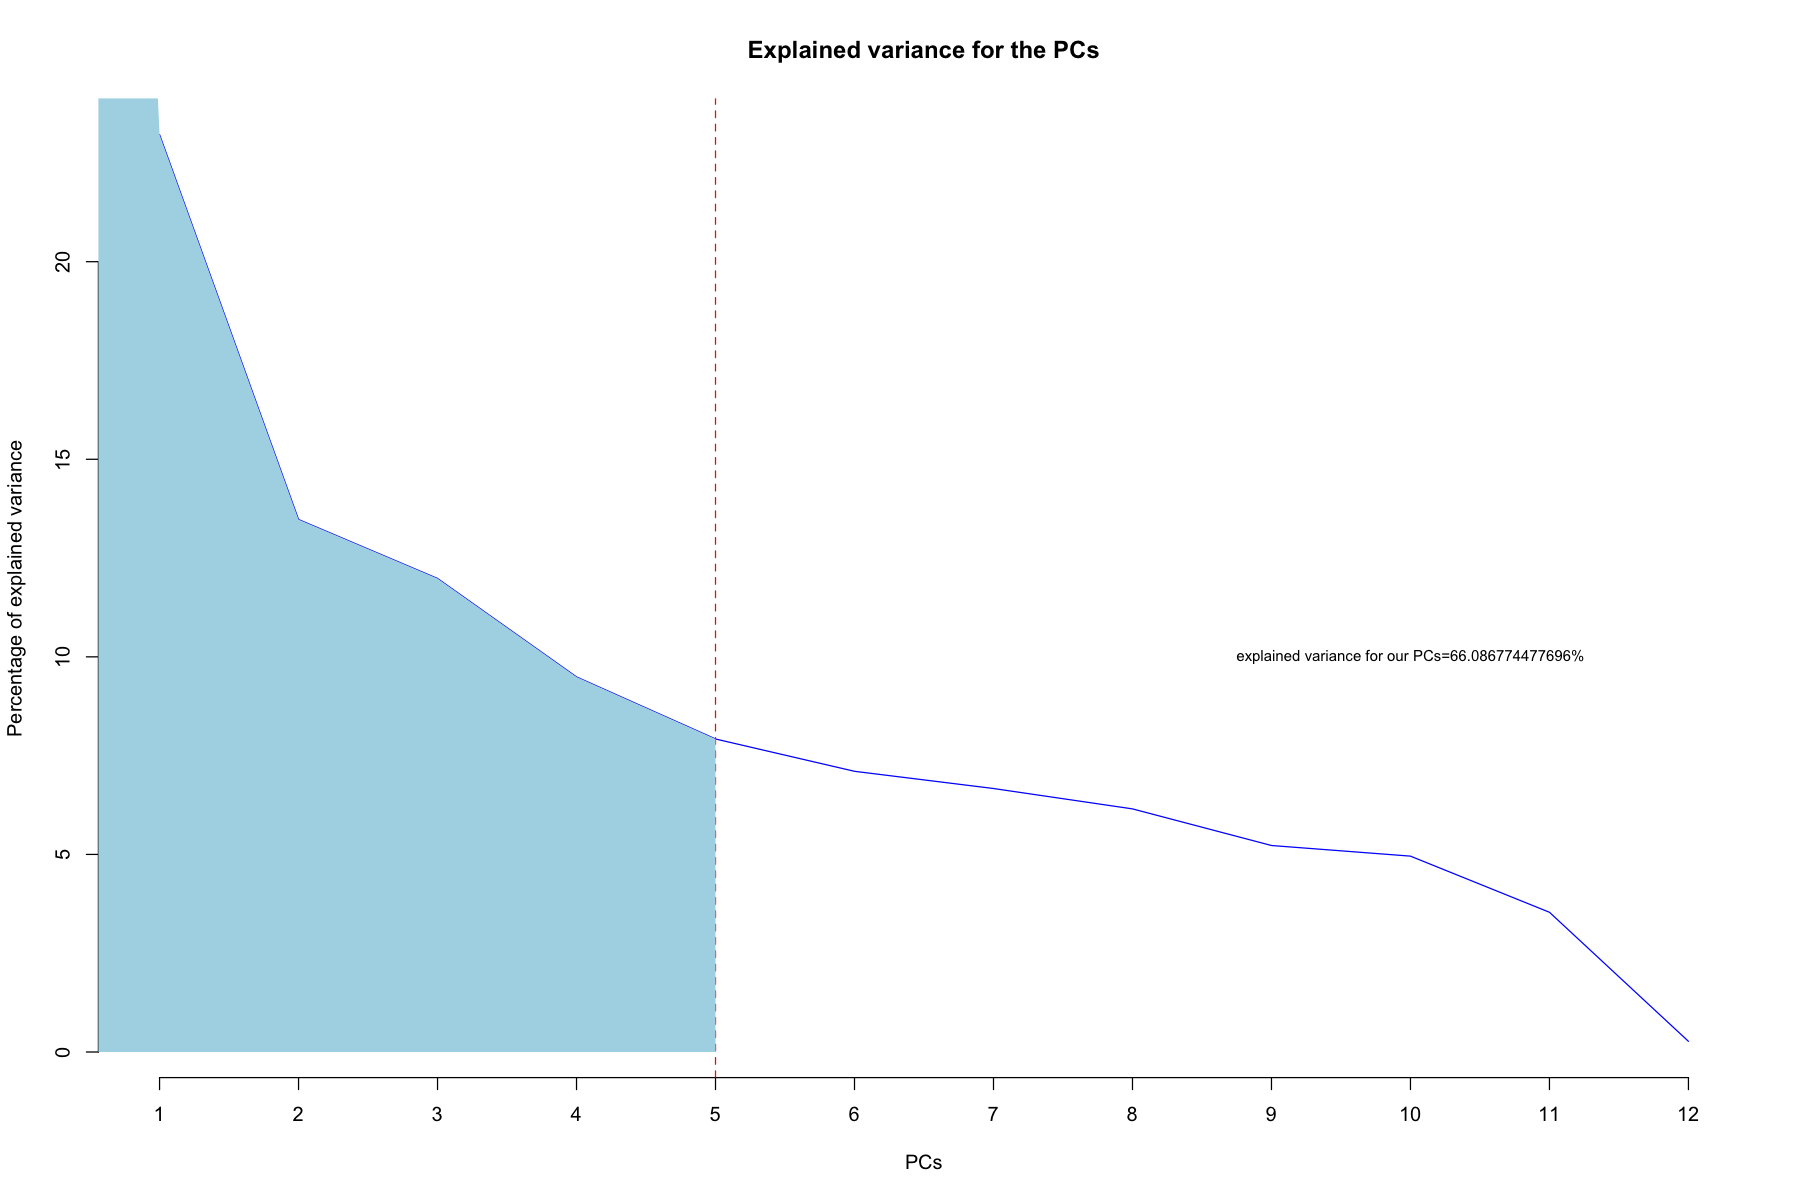

In [59]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=12)])

## plot:

plot(1:12, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:12)
axis(2)
text(x=10, y=10,cex=0.75,paste0("explained variance for our PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)



x2 = c(0,0,1:5,5)
y2 = c(0,100,explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=12)],0)
polygon(x2,y2, col="lightblue", border=NA)


Let's now  plot Plot the regression coefficients associated to the models with increasing PCs, from 1 to 5
We see that we have our 5 models. We look for the picks. As picks are higher as our model is better (model 1 coefficients almost 0). 
On the basis of the first PC,Price is associated to cylinders, to the features of the nk.capacity, lenght and weight. The second PC gives weight also to the presence of horsepower.

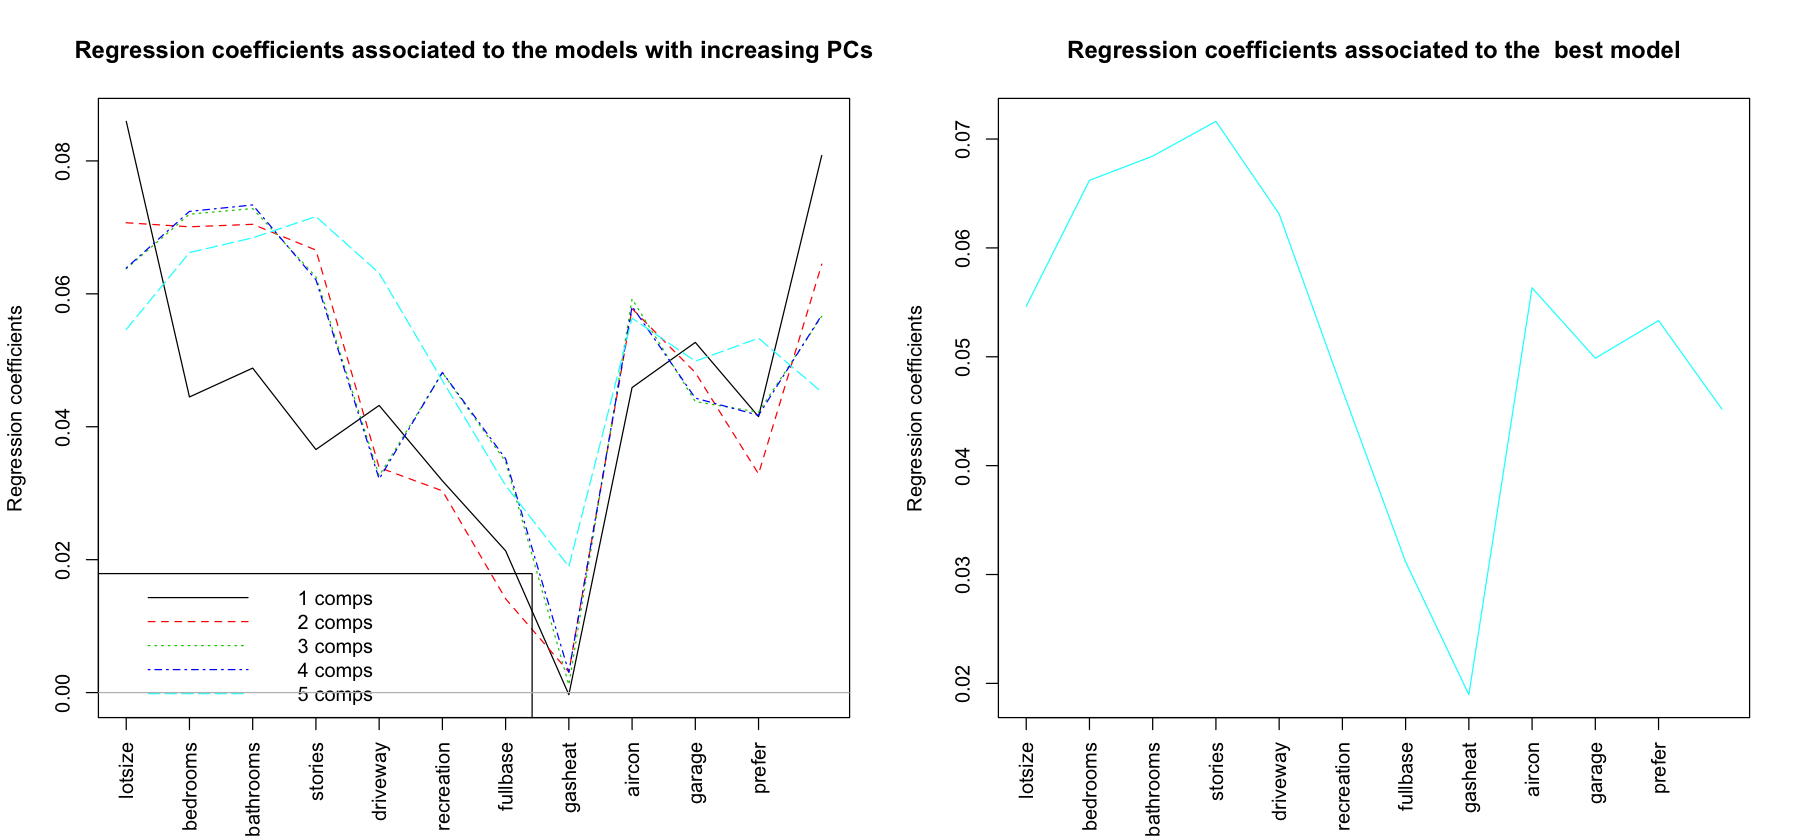

In [60]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:selectNcomp(m.pcr, method='onesigma', ncomp=12), legendpos='bottomleft', main='',
        xlab='', ylab='Regression coefficients',xaxt="n")
axis(1, at=1:11, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=5, main='', xlab='',,xaxt="n", ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to the  best model")
axis(1, at=1:11, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do  see a kind of trends (polynomial) in the groups. So even if the PCA has got a good explained deviance it could be improved.

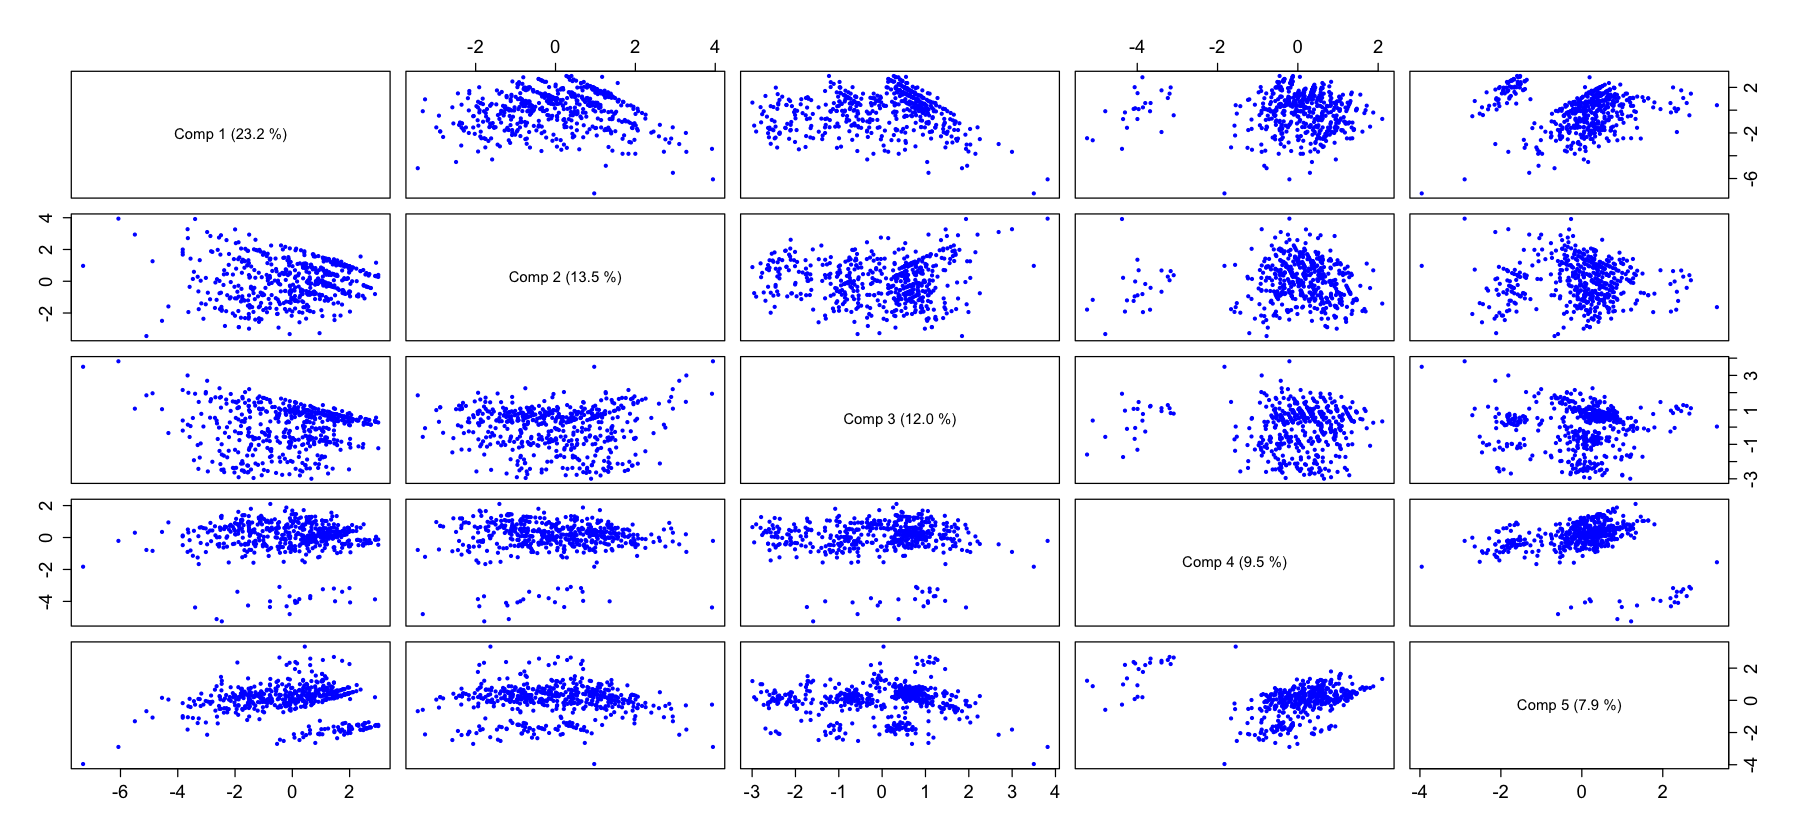

In [61]:
scoreplot(m.pcr, comps=1:selectNcomp(m.pcr, method='onesigma', ncomp=12), cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")


Finally, evaluate the predictions from the model.
Values around the bisector does suggest a good behavior of the model.

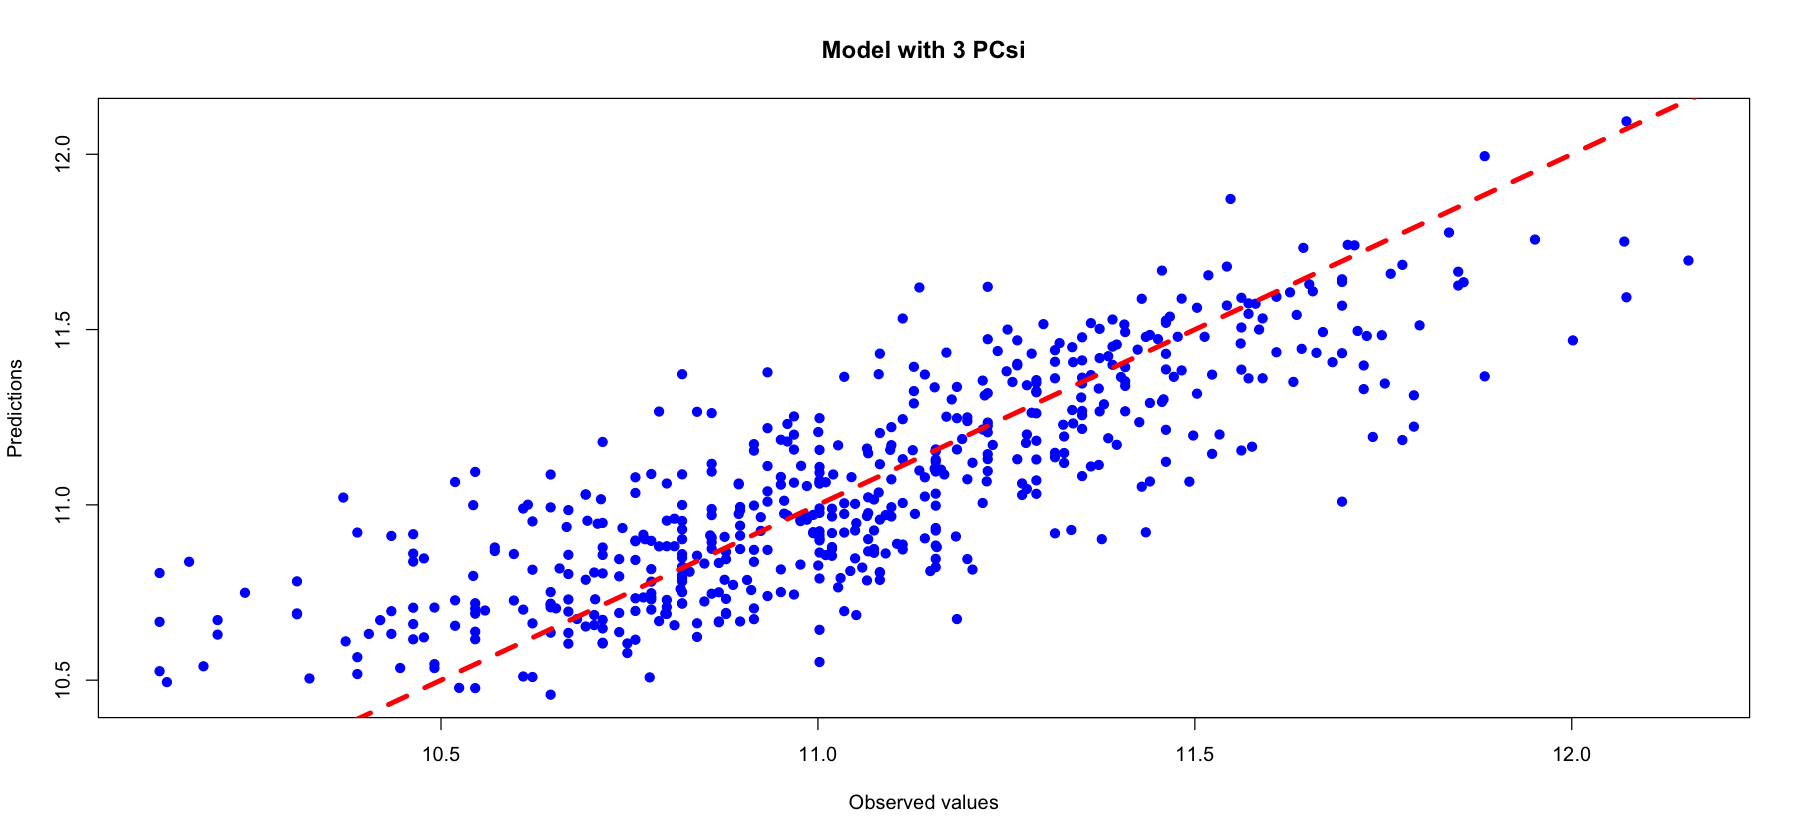

In [62]:
# plot predizione
plot(mydata$Price,predict(m.pcr,mydata,ncomp=2), xlab='Observed values', ylab='Predictions',
        main='Model with 2 PCsi',col="blue",pch=19)
abline(0, 1, col="red",lt=2,lwd=4)

Finally we compute the MSE considering 2 components which is equal to: 3.19. This is pretty high meaning that as shown in the clustering plot above the PCA is not satisfactory

In [ ]:
pcr.pred=predict(m.pcr,mydata,ncomp=2)
mean((pcr.pred-mydata$taking)^2)

# Conclusion

Base on MSE we have:
- ... for lasso

- for ridge

- for automatic selection

- for PCA

So based on MSE the best approach is ..... By the way with PCA with 2 components we have a simpler model this is why we have an higher MSE probably. 